<a href="https://colab.research.google.com/github/sayak-coding/10Year_CardioVascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><center>Problem Statement </b></center>
# The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. <b><u> The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).</u></b> The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

# <b><center>Data Description</b></center>
# Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.
#<b><u>Demographic:</b></u>
#• Sex: male or female("M" or "F")
#• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
# <b><u>Behavioral</u></b>
#• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
#• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
#<b><u>Medical( history)</b></u>
#• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
#• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
#• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
#• Diabetes: whether or not the patient had diabetes (Nominal) 
#<b><u>Medical(current)</b></u>
#• Tot Chol: total cholesterol level (Continuous)
#• Sys BP: systolic blood pressure (Continuous)
#• Dia BP: diastolic blood pressure (Continuous)
#• BMI: Body Mass Index (Continuous)
#• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
#• Glucose: glucose level (Continuous)
#<b><u>Predict variable (desired target)</b></u>
#• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# <b><center>Import Modules </b></center>

In [167]:
pip install catboost # install catboost module 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [168]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [169]:
pip install gitly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
#Data Analysis 
import pandas as pd # for data frame 
import numpy as np # for linear algebra 

#Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

#Pre processing / Feature Engineering
from sklearn.preprocessing import MinMaxScaler # scaled data for except normalize features
from sklearn.model_selection import train_test_split # for spliting train and test data set 
from sklearn.preprocessing import StandardScaler # scaled data for normalized feautures 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest # Select features according to the k highest scores
from sklearn.feature_selection import SelectFromModel # Meta-transformer for selecting features based on importance weights
from sklearn.model_selection import train_test_split # plit arrays or matrices into random train and test subsets

#Machine Learning
from sklearn.naive_bayes import GaussianNB # gaussian naive classifier 
from sklearn.tree import DecisionTreeClassifier # decision tree calssifier 
from sklearn.neighbors import KNeighborsClassifier # k nearest calssifier 
from sklearn.ensemble import RandomForestClassifier # random forest classifier 
from sklearn.linear_model import LogisticRegression # logistic regression 
from sklearn import model_selection # Split arrays or matrices into random train and test subsets
from sklearn.utils import class_weight # Estimate class weights for unbalanced datasets
from xgboost import XGBClassifier # xgboost classifier 
from sklearn.ensemble import AdaBoostClassifier # adaboost classifier
from sklearn.ensemble import GradientBoostingClassifier # gradientboosting classifier
import lightgbm as lgb # lightgbm classifier
import xgboost as xgb # xgb classifier
from catboost import CatBoostClassifier # catboost classifier

#Evaluating algorithms
from sklearn.model_selection import GridSearchCV # grid search cv
from sklearn.model_selection import RandomizedSearchCV # randomized search cv 
from skopt import BayesSearchCV # bayesian search cv 
from skopt.space import Real, Categorical, Integer # in bayes search take real, integer, and categorical variable

#Evaluating metrics
from sklearn.model_selection import KFold # for k consecutive folds
from sklearn.model_selection import cross_val_score # for cross validation score
from sklearn.metrics import confusion_matrix, accuracy_score # for confusion matrix and accuracy score
from sklearn.metrics import classification_report # for showing main classification metrics
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix # for plot roc_auc curve and confusion matrix 
from sklearn.metrics import precision_score # for calculate precision score
from sklearn.metrics import recall_score # for calculate recall score
from sklearn.metrics import f1_score # for calculate f1 score
from sklearn.metrics import roc_auc_score # for calculate roc_auc score
from sklearn.metrics import roc_curve # for show roc curve 
from sklearn.metrics import auc # for determine auc on roc curve 

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE

#Warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# show the plot on github
from gitly.colab.plot import GitlyPlotter

#<b><center>Importing CSV File</b></center>

In [171]:
# importing the csv file 

Heart_Attack_Risk = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone project/ML- Supervised Classification Capstone Project /data_cardiovascular_risk.csv")

In [172]:
Heart_Attack_Risk.head() # showing the top 5 rows of the data set  

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [173]:
Heart_Attack_Risk.shape # showing the shape of the data set

(3390, 17)

<b>So, we have 3390 rows 17 columns.

In [174]:
Heart_Attack_Risk.info() # showing the data type of every columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

<b>So, we see that, we have 2 objective type columns, 6 columns are integer type and other 9 columns are float data type. 

# <b><center> NAN Values Operation <b><center>



In [175]:
#total count and percentage of missing data
count=0 # initialization of null values with zero. i.e. at first we select there is no nan values in the particular column 
for i in Heart_Attack_Risk.isnull().sum(axis=1): # create a for loop which check nan values of every coloumn   
    if i>0: # if nan values greater than zero 
        count=count+1 # then nan values equlas to previous nan values + 1 
print('Total number of rows with missing values is ', count,'i.e. it is only',
      round((count/len(Heart_Attack_Risk.index))*100), 'percent of the entire dataset') # print the total count of nan values and total % of nan values 

Total number of rows with missing values is  463 i.e. it is only 14 percent of the entire dataset


In [176]:
missing = pd.concat([Heart_Attack_Risk.isnull().sum()], axis=1, keys=["Total"]) # creating a data frame with the nan values 
missing

,Total
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [177]:
missing_columns = missing.loc[missing['Total']>0,:].sort_values(by=['Total'],ascending = False) # showing the only nan values column which is greater than zero 
missing_columns

,Total
glucose,304
education,87
BPMeds,44
totChol,38
cigsPerDay,22
BMI,14
heartRate,1


<b>So, we have null values on total 463 rows and the columns of null values are  "glucose", " education", "bpmeds", "totchol", "cigsperday", "bmi", and "heartrate".

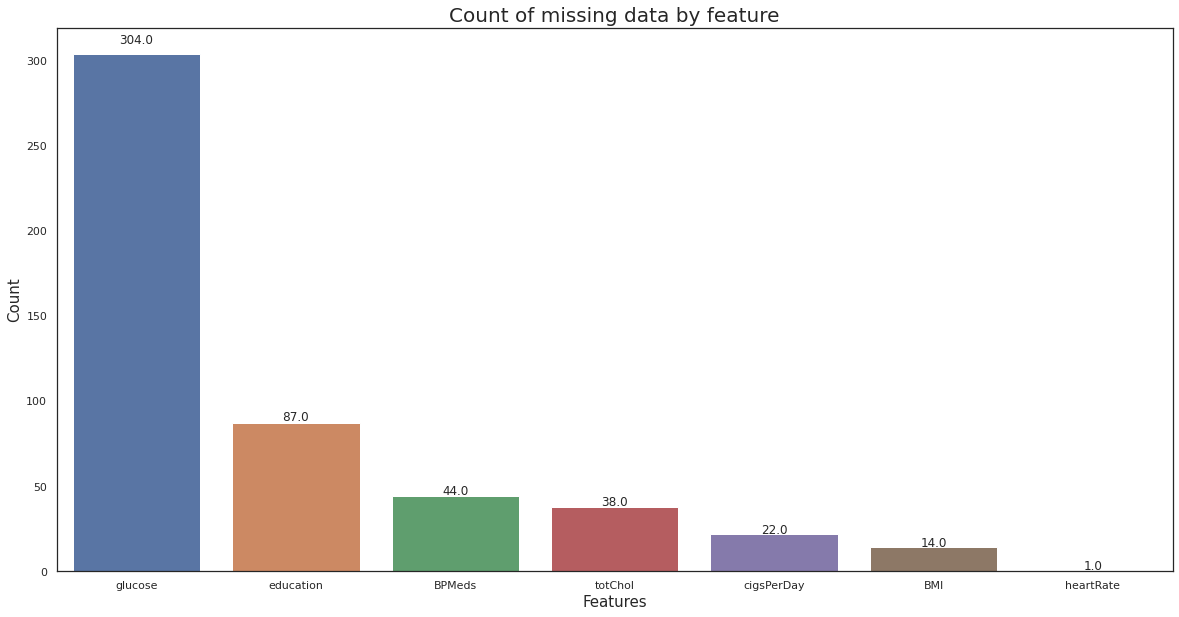

In [178]:
# Visualization of null values count
plt.figure(figsize=(20,10)) # set the figure size
sns.set(style="white") # set the background of the graph 
ax = sns.barplot(x=missing_columns.index, y=missing_columns['Total'], data = missing_columns) # set the x and y axis of the graph
plt.xlabel('Features', fontsize=15) # set the name and size of the x label of the graph
plt.ylabel('Count', fontsize=15) # set the name and size of the y label of the graph
plt.title('Count of missing data by feature',fontsize = 20) # set the name and size of the graph
for p in ax.patches: # for showing count of the each lavel
    width = p.get_width() # width of each colummn 
    height = p.get_height() # height for each column 
    x, y = p.get_xy() # getting x and y values
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center') # for showing the count value and the position of the value 
plt.show() # showing the final plot 

<b>There are diffrent ways to handle with null values, most commonly - the deletion of null values row. But here, if we delete the entire null values rows, we will loss 14% of our data which is might be useful. So, here replaced the null values with mean values of that column. 

In [179]:
#replacement of null values
for i in missing_columns.axes[0].tolist(): # create a for loop which goes to every index of the missing columns 
    Heart_Attack_Risk[i].fillna(Heart_Attack_Risk[i].mean(),inplace=True) # and fill every nan values with mean values of that column. 

In [180]:
Heart_Attack_Risk.isnull().sum() # final check for null values 

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [181]:
Heart_Attack_Risk = Heart_Attack_Risk.drop(['id'], axis=1) # here is no importance of the column "id" so , here i droped it 

<b>Description of the data set

In [182]:
Heart_Attack_Risk.describe().T.style.background_gradient(cmap = "Blues") #describe the columns of the dataframe

,count,mean,std,min,25%,50%,75%,max
age,3390.000000,49.542183,8.592878,32.000000,42.000000,49.000000,56.000000,70.000000
education,3390.000000,1.970936,1.005915,1.000000,1.000000,2.000000,3.000000,4.000000
cigsPerDay,3390.000000,9.069477,11.840458,0.000000,0.000000,0.000000,20.000000,70.000000
BPMeds,3390.000000,0.029886,0.169190,0.000000,0.000000,0.000000,0.000000,1.000000
prevalentStroke,3390.000000,0.006490,0.080309,0.000000,0.000000,0.000000,0.000000,1.000000
prevalentHyp,3390.000000,0.315339,0.464719,0.000000,0.000000,0.000000,1.000000,1.000000
diabetes,3390.000000,0.025664,0.158153,0.000000,0.000000,0.000000,0.000000,1.000000
totChol,3390.000000,237.074284,44.993041,107.000000,206.000000,235.000000,264.000000,696.000000
sysBP,3390.000000,132.601180,22.292030,83.500000,117.000000,128.500000,144.000000,295.000000
diaBP,3390.000000,82.883038,12.023581,48.000000,74.500000,82.000000,90.000000,142.500000


# <b><center> <h1> &#x2022;&#x2022;&#x2022;&#x2022;&#x2022; Exploratory Data Analysis &#x2022;&#x2022;&#x2022;&#x2022;&#x2022; </b></center></h1>

# <center><b>Data Profiling

<b>Here I use Pandas profiling, it reduce lots of our work. Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.

In [183]:
pip install -U pandas-profiling # installing the module for pandas profilling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# I am using pandas profiling for exploratory data analysis

from pandas_profiling import ProfileReport

EDA_Report = ProfileReport(Heart_Attack_Risk, title="Pandas Profiling Report")
EDA_Report

In [309]:
EDA_Report.to_file("EDA_Report.html") #save the pandas profiling to a html file 

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>After looking at the pandas profiling report, we can say we have three types of attributes in our data:

1)NOMINAL:

<u>sex</u>: Male(1) or Female(0)

<u>currentSmoker</u>: Whether the paitent is smoker or not. Yes(1) and No(0)

<u>BPMeds</u>: Whether the paitent was on blood pressure medications. Yes(1) and No(0)

<u>prevalentStroke</u>: Whether the paitent had a stroke before. Yes(1) and No(0)

<u>prevalentHyp</u>: Whether the paitent has history of Hypertension. Yes(1) and No(0)

<u>diabetes</u>: Whether the paitent has diabetes. Yes(1) and No(0)

<u>TenYearCHD</u>: This is our target variable which we will be predicting. Yes(1) and No(0)

2)ORDINAL:

<u>education</u>: Defined in classes 1-4. Tells us how much our paitent is educated.

3)CONTINIOUS:

<u>age</u>: Contains ages of our paitents in whole numbers.

<u>cigsPerDay</u>: Contains the average of cigarettes smoked by the paitents in one day.

<u>totChol</u>: Contains total cholestrol level of each paitent.

<u>sysBP</u>: Contains systolic blood pressure levels of each paitent.

<u>diaBP</u>: Contains diastolic blood pressure levels of each paitent.

<u>BMI</u>: Contains body mass index of each paitent.

<u>heartRate</u>: Contains the average heart rate of the paitent.

<u>glucose</u>: Contains the glucose level of each paitent.

#<center><b> Dividind Features into Numerical and Categorical

<b>Here we divide the features in two category. One is numerical and other one is categorical. If the unique value of a column is greater than 5 then it consider as a numerical column or else it is a categorical column.

In [186]:
col = list(Heart_Attack_Risk.columns) # put the columns in a list 
categorical_features = [] # create a blank categorical column list 
numerical_features = [] # create a blank numerical column list
for i in col: # create a for loop which iterate every of the column list 
    if len(Heart_Attack_Risk[i].unique())>5: # if values of a particular column is greater than 5 
        numerical_features.append(i) # then the particular column append to the numerical features category
    else:
        categorical_features.append(i) # or else it will append to the categorical features
print('Numerical Features :',*numerical_features) # print the numerical features list , * means, it will print only names of the column not in list form 
print('Categorical Features :',*categorical_features) # print the categorical features list 

Numerical Features : age cigsPerDay totChol sysBP diaBP BMI heartRate glucose
Categorical Features : education sex is_smoking BPMeds prevalentStroke prevalentHyp diabetes TenYearCHD


#<center><b> Creating age group

<b>Here we see that ages varies from 32 to 70. So, for better analysis the following age groups will be created:

30-39 years\
40-49 years\
50-59 years\
60-70 years

In [187]:
Heart_Attack_Risk_ = Heart_Attack_Risk.copy() # create a duplicate dataframe 

In [188]:
# replace the column values 

Heart_Attack_Risk_['sex'] = Heart_Attack_Risk_['sex'].replace(['M'], 'Male') # replace the value M to Male of column sex 
Heart_Attack_Risk_['sex'] = Heart_Attack_Risk_['sex'].replace(['F'], 'Female') # replace the value F to Female of column sex
Heart_Attack_Risk_['is_smoking'] = Heart_Attack_Risk_['is_smoking'].replace(['YES'], '1') # replace the value Yes to 1 of column sex
Heart_Attack_Risk_['is_smoking'] = Heart_Attack_Risk_['is_smoking'].replace(['NO'], '0') # replace the value No to 0 of column sex

In [189]:
# Creating age group. Here by using pandas cut method we creating 4 diffrent age groups 
Heart_Attack_Risk_['ageGroup'] = pd.cut(x=Heart_Attack_Risk['age'], bins=[30, 39, 49, 59, 70], labels=['30-39 years', '40-49 years', '50-59 years', '60-70 years'])
Heart_Attack_Risk_.head() # showing the datframe after creating different age group from the column age 

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup
0,64,2.0,Female,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,60-70 years
1,36,4.0,Male,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,30-39 years
2,46,1.0,Female,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,40-49 years
3,50,1.0,Male,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,50-59 years
4,64,1.0,Female,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,60-70 years


# <b><center>Which gender more prone to heart attack ?

In [190]:
Heart_Attack_Risk_['Count_10YCHD'] = 1 # creating a new column 'count_10YCHD
data_gender_chd = Heart_Attack_Risk_.pivot_table('Count_10YCHD', ['sex', 'TenYearCHD'], aggfunc="sum").reset_index() # creating a table with the column "count 10ychd",
# "sex", and "tenyearchd" and count total sum of count 10ychd and ten year chd of every sex
data_gender_chd.head()

,sex,TenYearCHD,Count_10YCHD
0,Female,0,1684
1,Female,1,239
2,Male,0,1195
3,Male,1,272


In [191]:
gitly = GitlyPlotter('github')

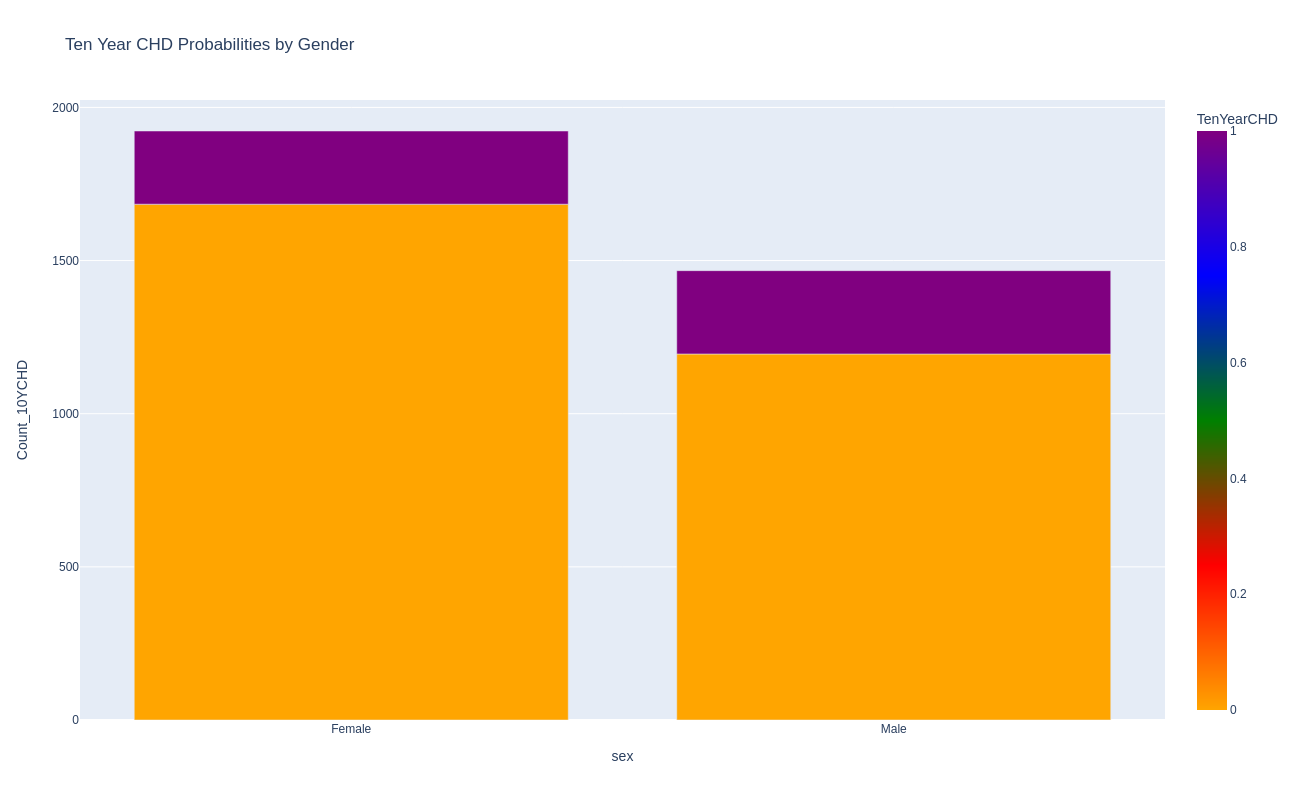

In [192]:
# Visualization
fig = px.bar(data_gender_chd, x="sex", y="Count_10YCHD", color="TenYearCHD", title="Ten Year CHD Probabilities by Gender",
             color_continuous_scale=["orange", "red","green","blue","purple"])
fig.show()
gitly.config_render('git', default_height = 800, default_width = 1300) # set default values for all gitly.show()
gitly.show( fig )

<b>Conclusion : Here we see that male are slightly more prone to heart attack than female. Out of 3390 patient 272 males are victim of heart attack, and 239 females are prone to heart attack. 

# <b><center>Which gender and age group smoke more ?

<b>Here we look for which age group of every sex are smoke more

In [193]:
Heart_Attack_Risk_['is_smoking'] = 1 # count of value 1 on column is_smoking 
data_gender_cs = Heart_Attack_Risk_.pivot_table('is_smoking', ['sex', 'ageGroup'], aggfunc="sum").reset_index() # creating a table with the column "is_smoking",
# "sex", and "ageGroup" and count total sum of count is_smoking and ageGroup on every sex  
data_gender_cs.head(10)

,sex,ageGroup,is_smoking
0,Female,30-39 years,241
1,Female,40-49 years,740
2,Female,50-59 years,617
3,Female,60-70 years,325
4,Male,30-39 years,215
5,Male,40-49 years,576
6,Male,50-59 years,444
7,Male,60-70 years,232


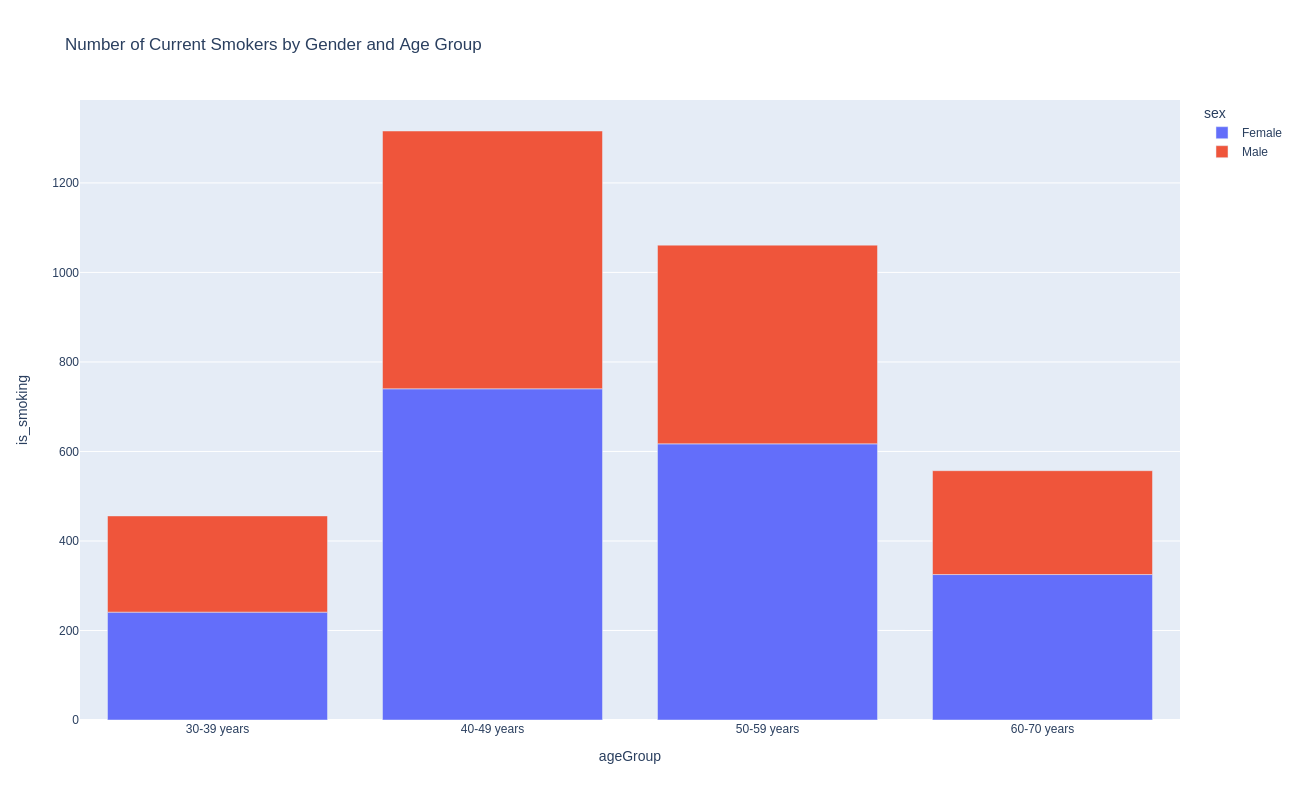

In [194]:
# Visualization
fig = px.bar(data_gender_cs, x="ageGroup", y="is_smoking", color="sex", title="Number of Current Smokers by Gender and Age Group")
fig.show()
gitly.show( fig )

<b>Conclusion : So, we see that female of 40-49 age group are smoke more and male of 30-39 age group smoke less among all age group of both genders. 

# <b><center>Check the relation between health condition like - Diabetes, Stroke, Hypertension

In [195]:
data_ = Heart_Attack_Risk_.pivot_table('Count_10YCHD', ['diabetes', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD'], aggfunc="sum").reset_index()
# create a data frame with data of "count 10ychd" with column "diabetes","'prevalentStroke', 'prevalentHyp', and 'TenYearCHD' 
# and select aggregate function as "sum"
data_['diabetes'] = data_['diabetes'].replace([1, 0], ['Diabetic','Non-Diabetic'])
# change the value of column "diabetes" 1 to 'Diabetic' and 0 to 'Non-Diabetic'
data_['prevalentHyp']=data_['prevalentHyp'].replace([0,1],['Not Hypertensive', 'Hypertensive'])
# change the value of column "prevalentHyp" 1 to 'Hypertensive' and 0 to 'Not Hypertensive'
data_['prevalentStroke']=data_['prevalentStroke'].replace([0,1],['Never had a stroke', 'Has had a stroke'])
# change the value of column "prevalentStroke" 1 to 'Has had a stroke' and 0 to 'Never had a stroke'
data_.head(14) # showing the fnal dataset after replacing value 

,diabetes,prevalentStroke,prevalentHyp,TenYearCHD,Count_10YCHD
0,Non-Diabetic,Never had a stroke,Not Hypertensive,0,2031
1,Non-Diabetic,Never had a stroke,Not Hypertensive,1,245
2,Non-Diabetic,Never had a stroke,Hypertensive,0,782
3,Non-Diabetic,Never had a stroke,Hypertensive,1,224
4,Non-Diabetic,Has had a stroke,Not Hypertensive,0,5
5,Non-Diabetic,Has had a stroke,Not Hypertensive,1,1
6,Non-Diabetic,Has had a stroke,Hypertensive,0,7
7,Non-Diabetic,Has had a stroke,Hypertensive,1,8
8,Diabetic,Never had a stroke,Not Hypertensive,0,29
9,Diabetic,Never had a stroke,Not Hypertensive,1,10


<b><center>Relation between hypertension and heart attack risk 

In [196]:
data_hyp = data_.groupby(['prevalentHyp', 'TenYearCHD']).sum().reset_index() # groupby the column prevalentHyp and TenYearCHD and show sum on the column Count_10YCHD
data_hyp.head()

,prevalentHyp,TenYearCHD,Count_10YCHD
0,Hypertensive,0,814
1,Hypertensive,1,255
2,Not Hypertensive,0,2065
3,Not Hypertensive,1,256


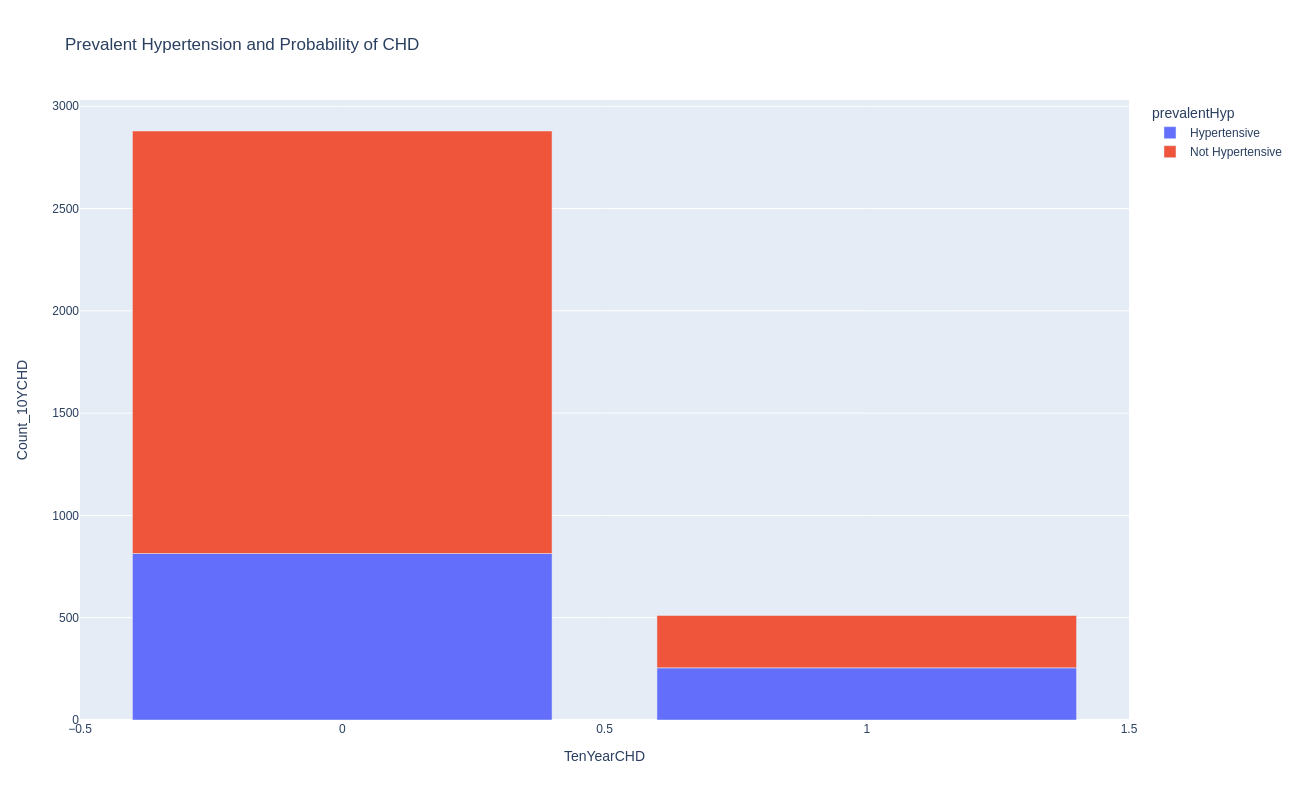

In [197]:
# Visualization
fig = px.bar(data_hyp, x="TenYearCHD", y="Count_10YCHD", color="prevalentHyp", title="Prevalent Hypertension and Probability of CHD")
fig.show()
gitly.show( fig )

<b> Conclusion: If a patient has hypertension or don't has any hypertension, in both case the risk of heart disease is same. 

<b><center>Relation between diabetes and heart attack risk 

In [198]:
data_dia = data_.groupby(['diabetes', 'TenYearCHD']).sum().reset_index() # groupby the column diabetes and TenYearCHD and show sum on the column Count_10YCHD
data_dia.head()

,diabetes,TenYearCHD,Count_10YCHD
0,Diabetic,0,54
1,Diabetic,1,33
2,Non-Diabetic,0,2825
3,Non-Diabetic,1,478


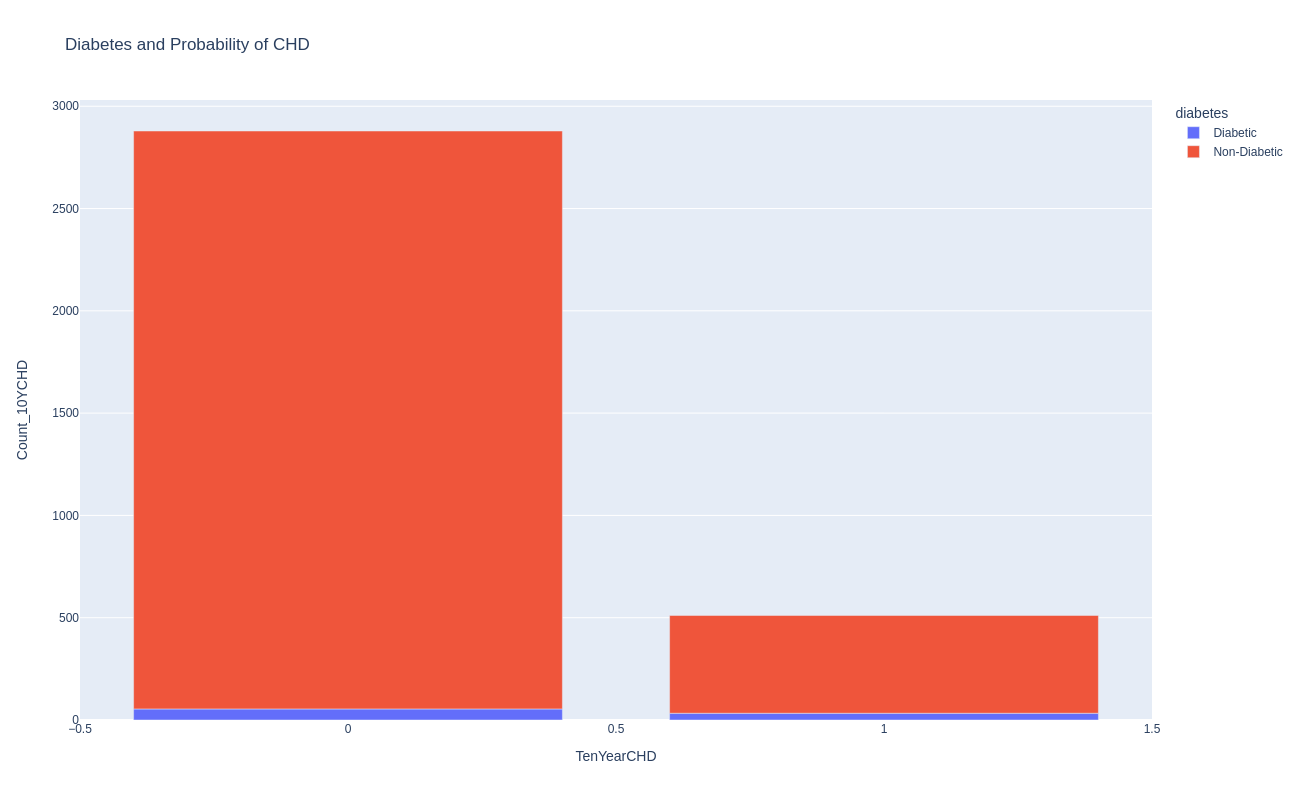

In [199]:
# Visualization
fig = px.bar(data_dia, x="TenYearCHD", y="Count_10YCHD", color="diabetes", title="Diabetes and Probability of CHD")
fig.show()
gitly.show( fig )

<b> Conclusion : If a patient is a diabetic then out 3390 patient only 33 patients have risk of heart attack risk, where for the non diabetic patient the count of heart attack patient is 478. 

<b><center>Relation between stroke and heart attack risk 

In [200]:
data_str = data_.groupby(['prevalentStroke', 'TenYearCHD']).sum().reset_index() # groupby the column prevalentStroke and TenYearCHD and show sum on the column Count_10YCHD
data_str.head()

,prevalentStroke,TenYearCHD,Count_10YCHD
0,Has had a stroke,0,12
1,Has had a stroke,1,10
2,Never had a stroke,0,2867
3,Never had a stroke,1,501


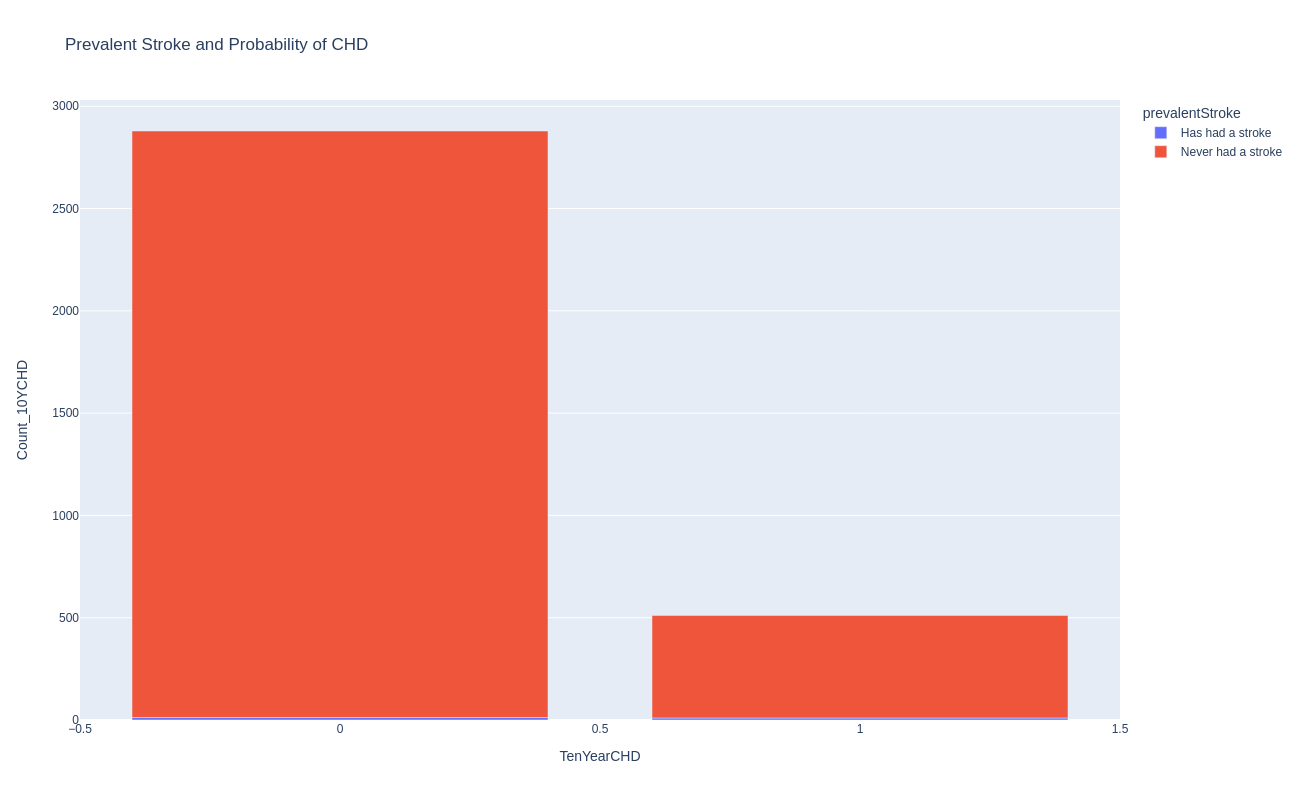

In [201]:
# Visualization
fig = px.bar(data_str, x="TenYearCHD", y="Count_10YCHD", color="prevalentStroke", title="Prevalent Stroke and Probability of CHD")
fig.show()
gitly.show( fig )

<b>Conclusion : If a patient has had a stroke before, and risk of hert disease, that kind of patient on a count is 10 only. But a person never had a stroke but has risk of heart attack, these kind of patient on a count is 501.

# <b><center>BMI, Cholesterol, Glucose and Heart rate levels by age group

<b><center>Cholesterol by age group 

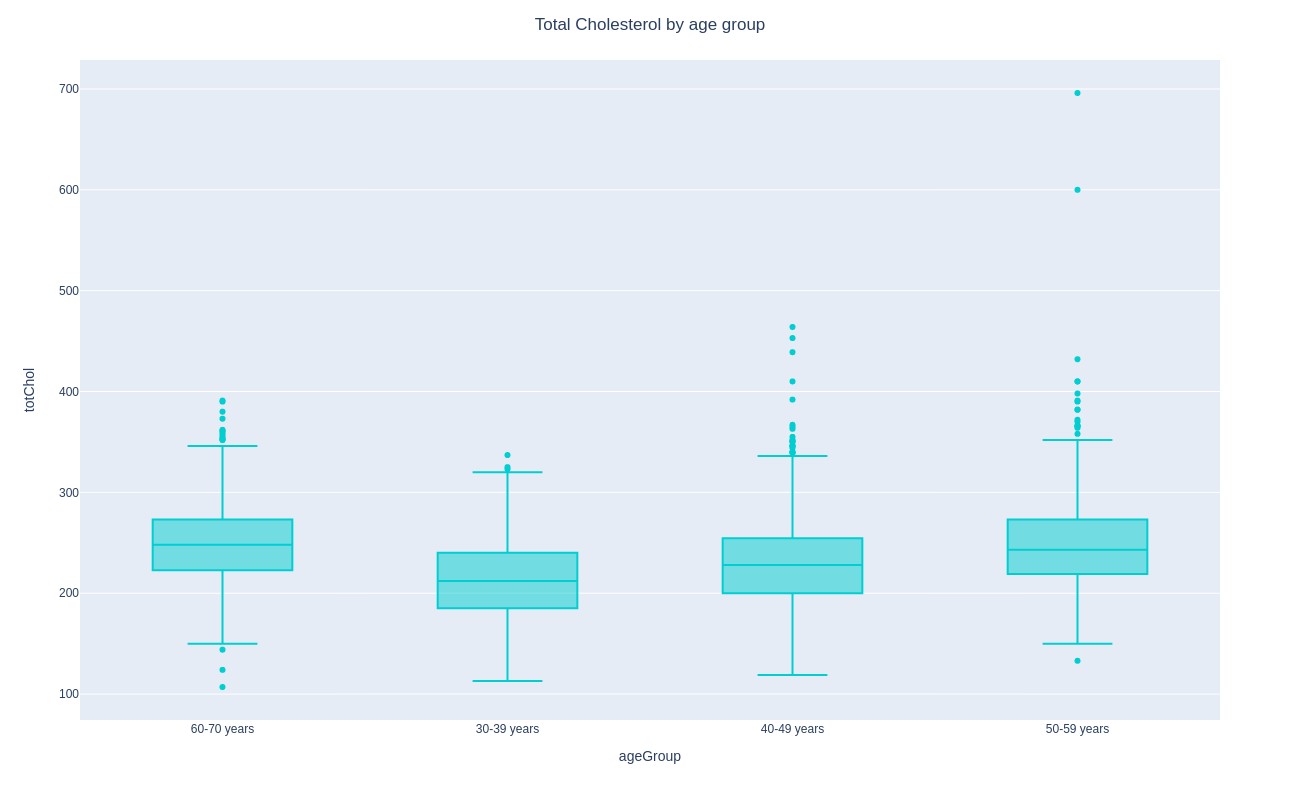

In [202]:
# A px.box is a statistical representation of the distribution of a variable through its quartiles. 
chol = px.box(Heart_Attack_Risk_, x="ageGroup", y="totChol", color_discrete_sequence=['DarkTurquoise'], width=1300, height=800)
chol.update_layout(title={'text': "Total Cholesterol by age group", 'x':0.5, 'xanchor': 'center'})
chol.update_layout(hoverlabel=dict(bgcolor="white",font_size=12,font_family="Rockwell"))
chol.show()
gitly.show( chol )

<b> Conclusion: From the boxplots we can see that:


*   Age group 30-39 years seem to have lower levels of total cholesterol, with median of 212.
*   The median for age group 60-70 years was the highest of all: 248, the second age group on this list was 50-59 years, following the trend that total cholesterol levels tend to be higher in an older population.






<b><center>BMI by age group

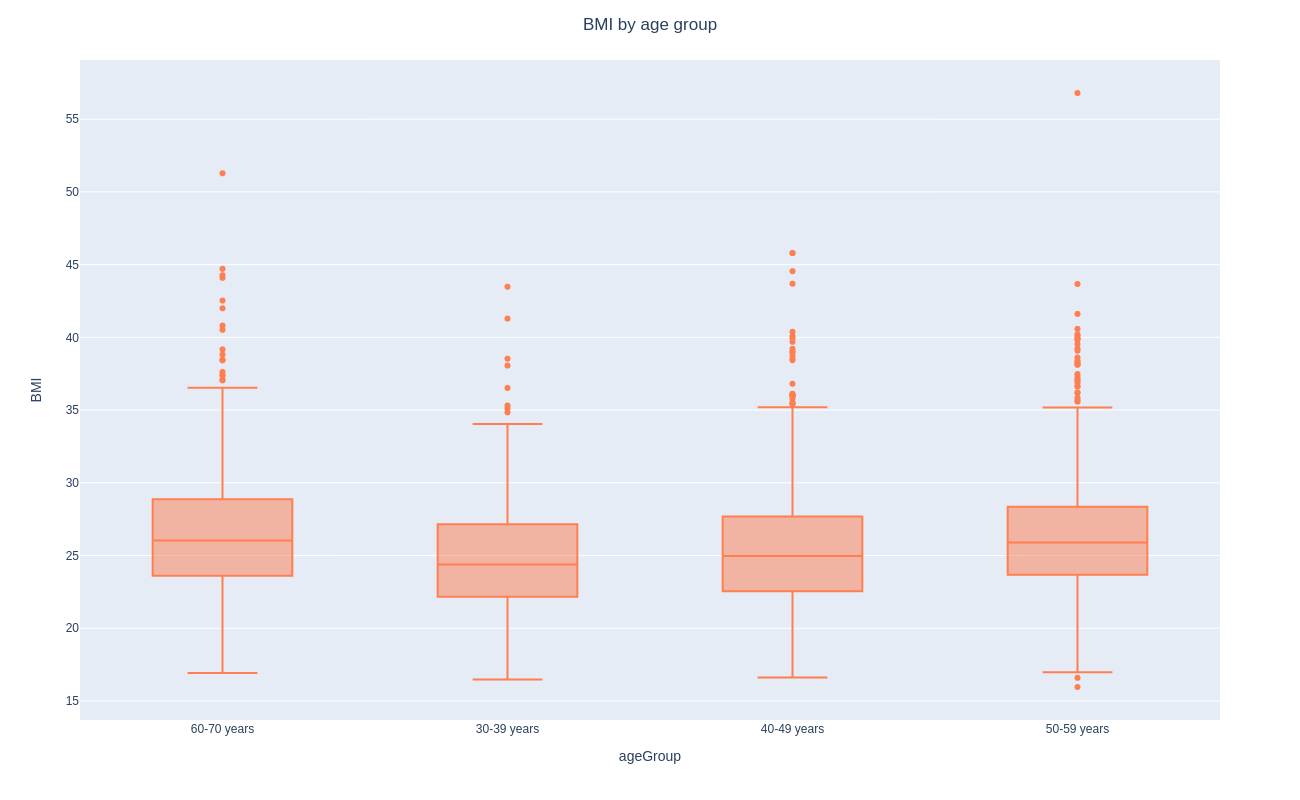

In [203]:
bmi = px.box(Heart_Attack_Risk_, x="ageGroup", y="BMI",color_discrete_sequence=['Coral'], width=1300, height=800)
bmi.update_layout(title={'text': "BMI by age group",'x':0.5,'xanchor': 'center'})
bmi.update_layout(hoverlabel=dict( bgcolor="white",font_size=12,font_family="Rockwell"))
bmi.show()
gitly.show( bmi )

<b> Conclusion: From the boxplots we can see that:


*   Age group 30-39 years seem to have lower levels of bmi, with median of 24.39.
*   The median for age group 60-70 years was the highest of all: 26.04, the second age group on this list was 50-59 years, following the trend that bmi levels tend to be higher in an older population.






<b><center>Glucose by age group 

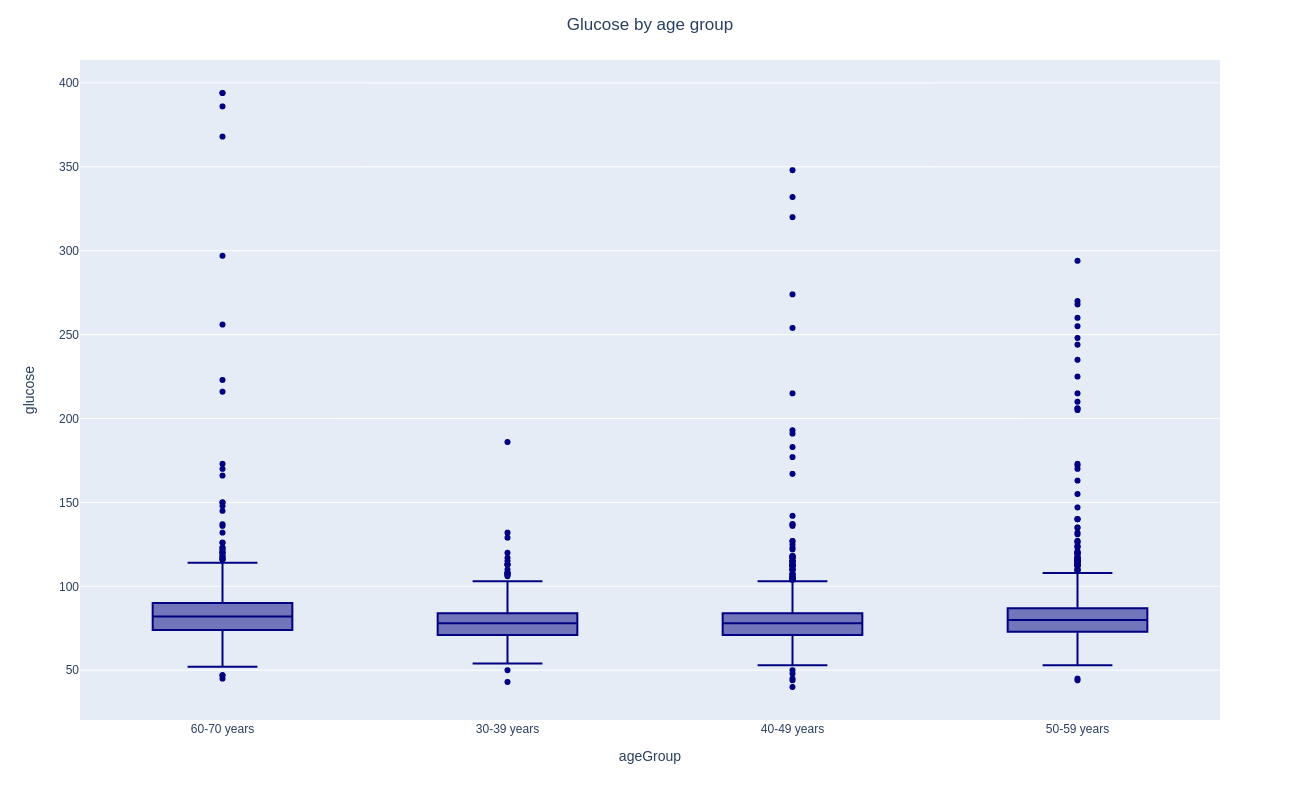

In [204]:
glu = px.box(Heart_Attack_Risk_, x="ageGroup", y="glucose", color_discrete_sequence=['Navy'], width=1300, height=800)
glu.update_layout(title={'text': "Glucose by age group",'x':0.5,'xanchor': 'center'})
glu.show()
gitly.show( glu )

<b>Conclusion: From the boxplots we can see that:


*   Age group 30-49 years seem to have lower levels of total glucose, with median of 78.
*   The median for age group 60-70 years was the highest of all: 82, the second age group on this list was 50-59 years, following the trend that total glucose levels tend to be higher in an older population.






<b><center>Heart rate by age group 

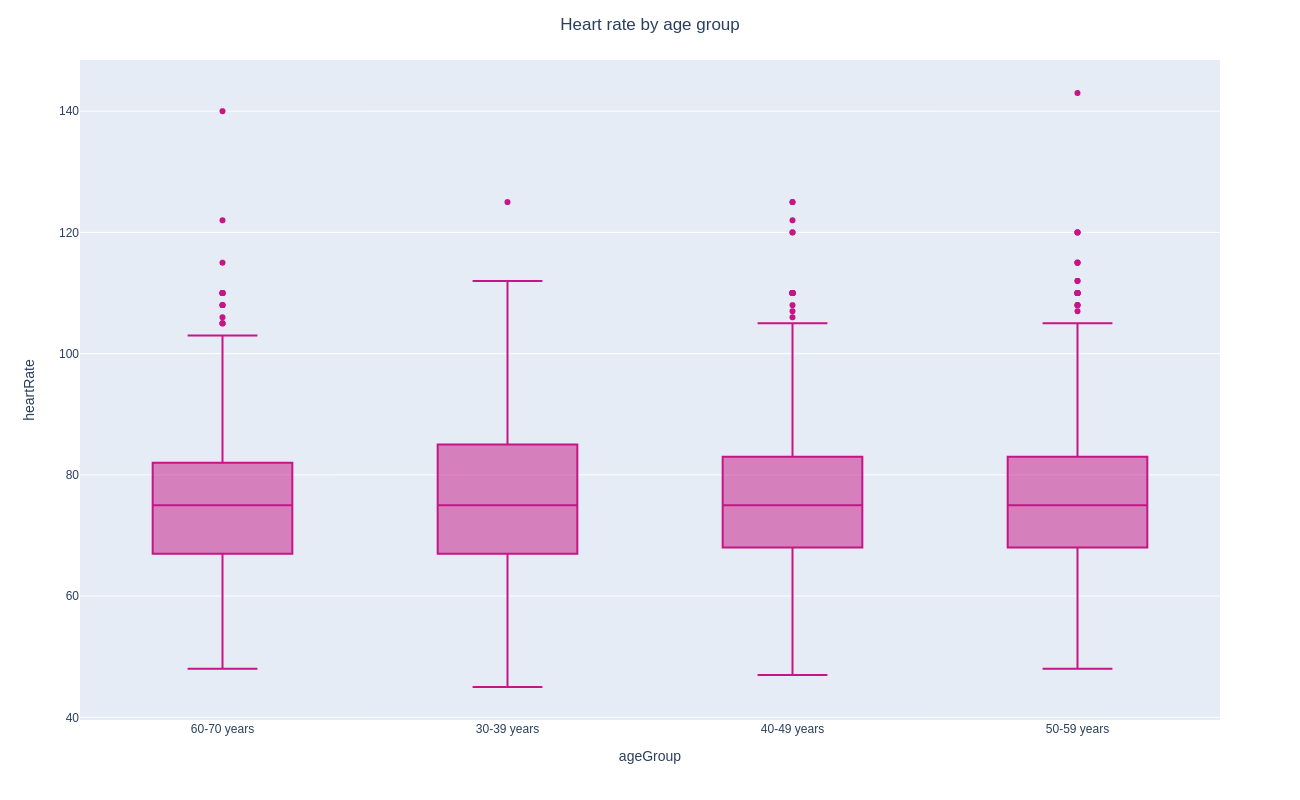

In [205]:
hrt = px.box(Heart_Attack_Risk_, x="ageGroup", y="heartRate", color_discrete_sequence=['MediumVioletRed'], width=1300, height=800)
hrt.update_layout(title={'text': "Heart rate by age group",'x':0.5,'xanchor': 'center'})
hrt.show()
gitly.show( hrt )

<b>Conclusion: From the boxplots we can see that:

 

*   Heart rate of all age group seems to have equal value with median 75




<b><center>Blood pressure by age group

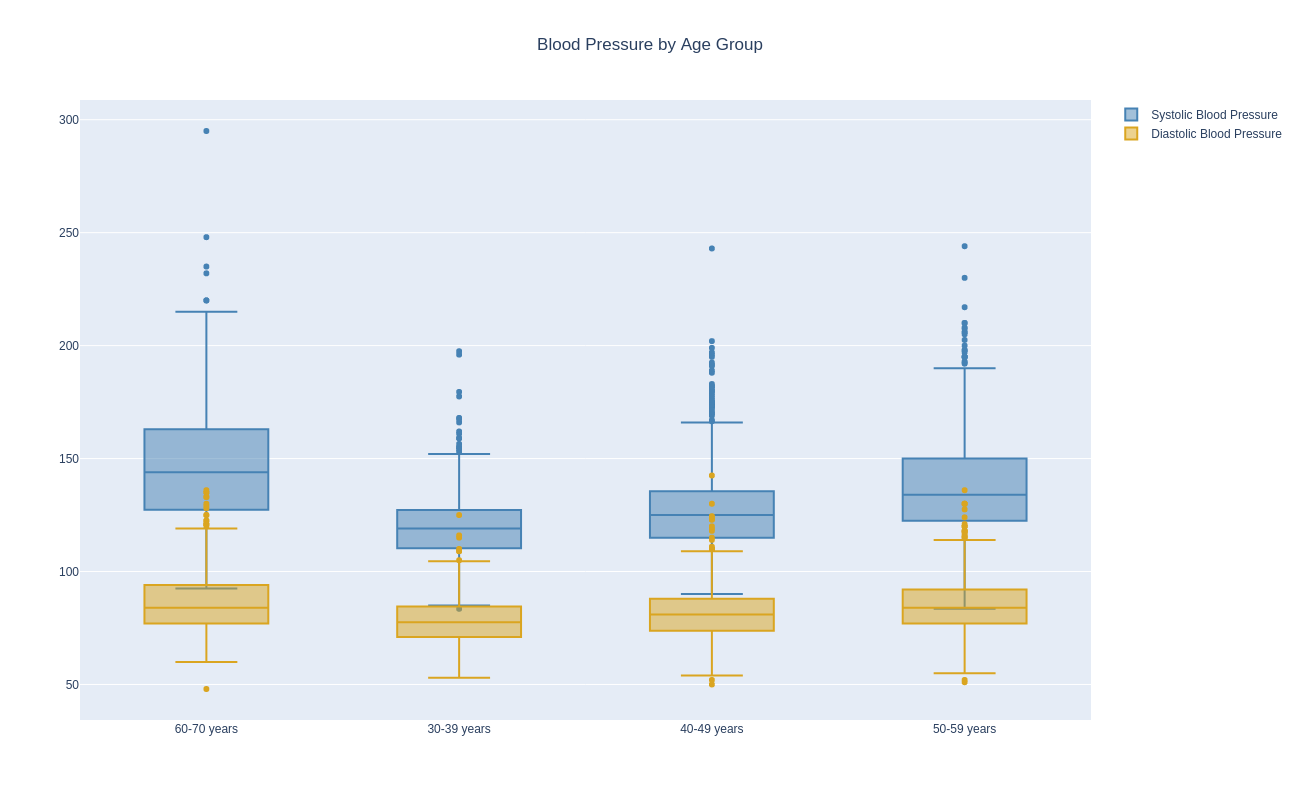

In [206]:
sbp = go.Box(x=Heart_Attack_Risk_['ageGroup'],y=Heart_Attack_Risk_['sysBP'], name='Systolic Blood Pressure', line=dict(color='steelblue'))
dbp = go.Box(x=Heart_Attack_Risk_['ageGroup'], y=Heart_Attack_Risk_['diaBP'], name='Diastolic Blood Pressure', line=dict(color='goldenrod'))
sdbp = go.Figure([sbp, dbp])
sdbp.update_layout(title={'text': "Blood Pressure by Age Group",'x':0.5,'xanchor': 'center'})
sdbp.show()
gitly.show( sdbp )

<b>Conclusion: From the boxplots we can see that:


*   Systolic and diastolic blood pressure of age group of 60-70 higher than any other age group with median value 144 and 84 respectively. The second age group on this list was 50-59 years, following the trend that Systolic and diastolic blood pressure levels tend to be higher in an older population.
*   Age group 30-49 years seem to have lower levels of Systolic and diastolic blood pressure, with median of 119.





#<b><center> Level of education vs cigerates per day

(array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 8 Text major ticklabel objects>)

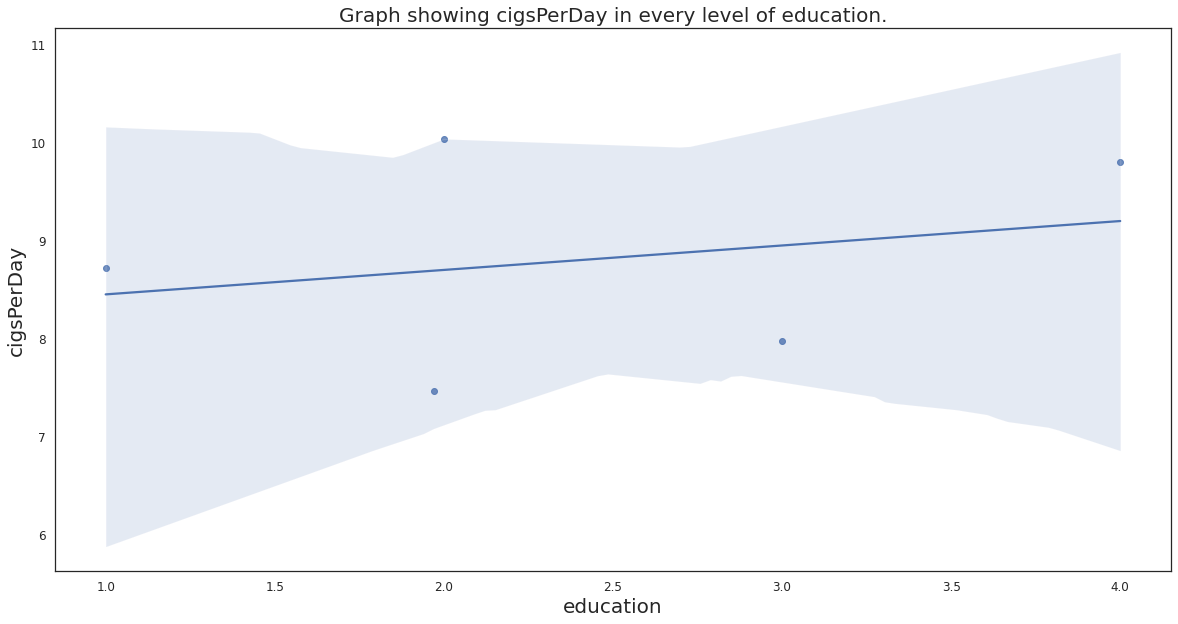

In [207]:
graph_1 = Heart_Attack_Risk_.groupby("education", as_index=False).cigsPerDay.mean() # groupby the column "education" and and average "cigsperday"
plt.figure(figsize=(20,10), facecolor='w') # set the figure size and face color
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"]) # set the x and y axis 
plt.title("Graph showing cigsPerDay in every level of education.", size=20) # set the title of the plot 
plt.xlabel("education", size=20) # set the label of x axis
plt.ylabel("cigsPerDay", size=20) # set the label of y axis 
plt.xticks(size=12)# set x ticks
plt.yticks(size=12) # set y ticks

<b>Conclusion : Here we see that we have education level of 1-4 class and we also see that education level of class 2 are more prone to smoke.

#<b><center>Label Encoder 

<b> Here we encode the value of those columns whose values are other than binary values.

In [208]:
from sklearn.preprocessing import LabelEncoder # Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) to each class of data.
le = LabelEncoder() # label_encoder object knows how to understand word labels.
Heart_Attack_Risk_['sex'] = le.fit_transform(Heart_Attack_Risk_['sex']) # Encode labels in column 'sex'.
Heart_Attack_Risk_['education'] = le.fit_transform(Heart_Attack_Risk_['education']) # Encode labels in column 'education'.
Heart_Attack_Risk_['is_smoking'] = le.fit_transform(Heart_Attack_Risk_['is_smoking']) # Encode labels in column 'is_smoking'.
Heart_Attack_Risk_['BPMeds'] = le.fit_transform(Heart_Attack_Risk_['BPMeds']) # Encode labels in column 'BPMeds'.
Heart_Attack_Risk_['prevalentStroke'] = le.fit_transform(Heart_Attack_Risk_['prevalentStroke']) # Encode labels in column 'prevalentStroke'.
Heart_Attack_Risk_['prevalentHyp'] = le.fit_transform(Heart_Attack_Risk_['prevalentHyp']) # Encode labels in column 'prevalentHyp'.
Heart_Attack_Risk_['diabetes'] = le.fit_transform(Heart_Attack_Risk_['diabetes']) # Encode labels in column 'diabetes'.
Heart_Attack_Risk_['TenYearCHD'] = le.fit_transform(Heart_Attack_Risk_['TenYearCHD']) # Encode labels in column 'TenYearCHD'.

# <b> <center>Target Variable Visualization

In [209]:
colors = ['#FF69B4','#00FFFF'] # Creating a color list

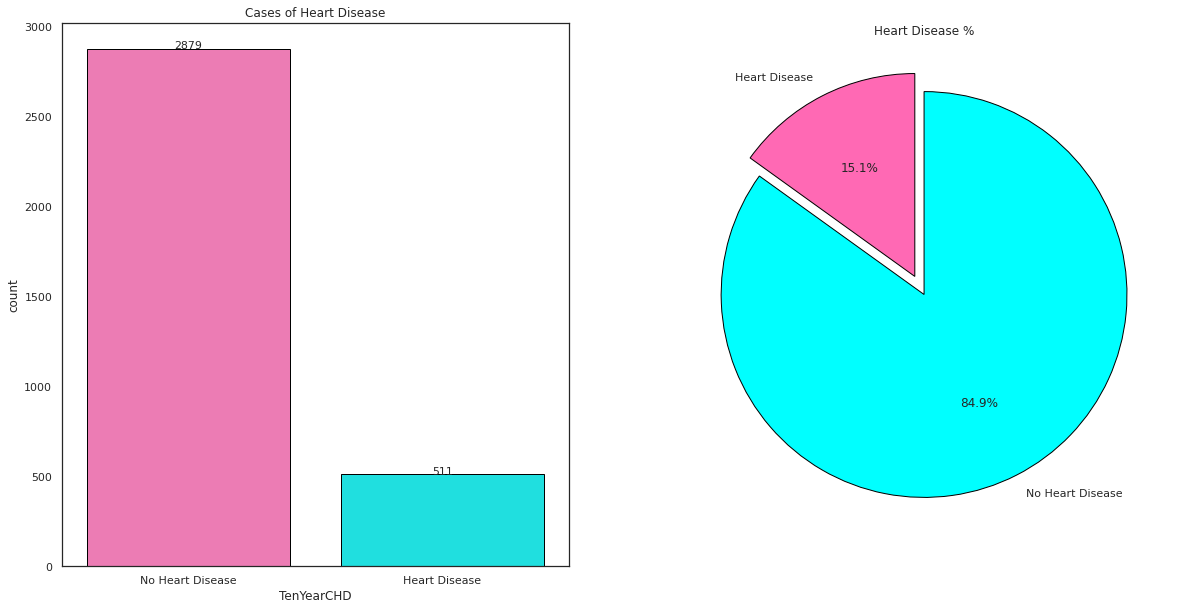

In [210]:
l = list(Heart_Attack_Risk_['TenYearCHD'].value_counts()) # take the values of the column "Ten Year CHD" and put in a list then count the value 
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100] # setting the circle size for pie chart

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,10)) # setting the number of rows and column , and size of the subplots
# for count plot 
plt.subplot(1,2,1) # plot the subplots with the position first row and first column 
ax = sns.countplot('TenYearCHD',data = Heart_Attack_Risk_,palette = colors,edgecolor = 'black') # plot a seaborn count plot for the column values of "TenYearCHD"
for rect in ax.patches: # for every pathces set the size of the rectangular plot
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease']) # set the name of two different category
plt.title('Cases of Heart Disease'); # st the title of the graph 
# for pie plot
plt.subplot(1,2,2) # plot the subplots with the position first row and second column 
plt.pie(circle,labels = ['Heart Disease','No Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}) # set the pie plot with the plot size, labels , colors 
plt.title('Heart Disease %'); # set the title of the plot 
plt.show() # show the plot 

<b>Conclusion :Out of 3390 patient 2879 patient have no heart disease i.e. 84.9% population has no heart problem, and 511 people has heart problem i.e. 15.1% population has risk of heart attack. 

So. it is a too unbalanced data set. 

# <b><center>Distribution of Categorical Features 

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


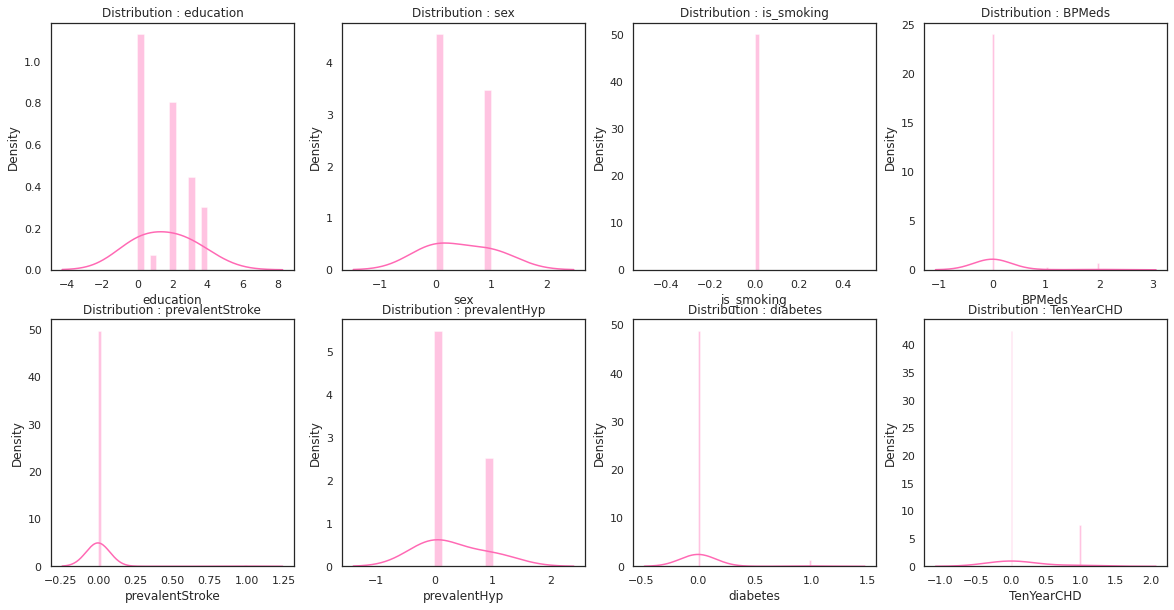

In [211]:
fig, ax = plt.subplots(nrows = 2,ncols = 4,figsize = (20,10)) # set the number of rows, number of columns and size of the sub plot
for i in range(len(categorical_features)): # pick up every features from categorical column 
    
    plt.subplot(2,4,i+1) # every iteration pick up one row and column and plot the features
    sns.distplot(Heart_Attack_Risk_[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]); # plot the every features with bandwith 1 and set the first colour from the list of colors 
    # title = 'Distribution : ' + categorical_features[i]
    plt.title('Distribution : ' + categorical_features[i]) # set the title distribution + features name 

<b>Conclusion : After looking the visualization we can say that all the categorical features are normally distributed 

# <b><center>Categorical Features vs Target Variable 

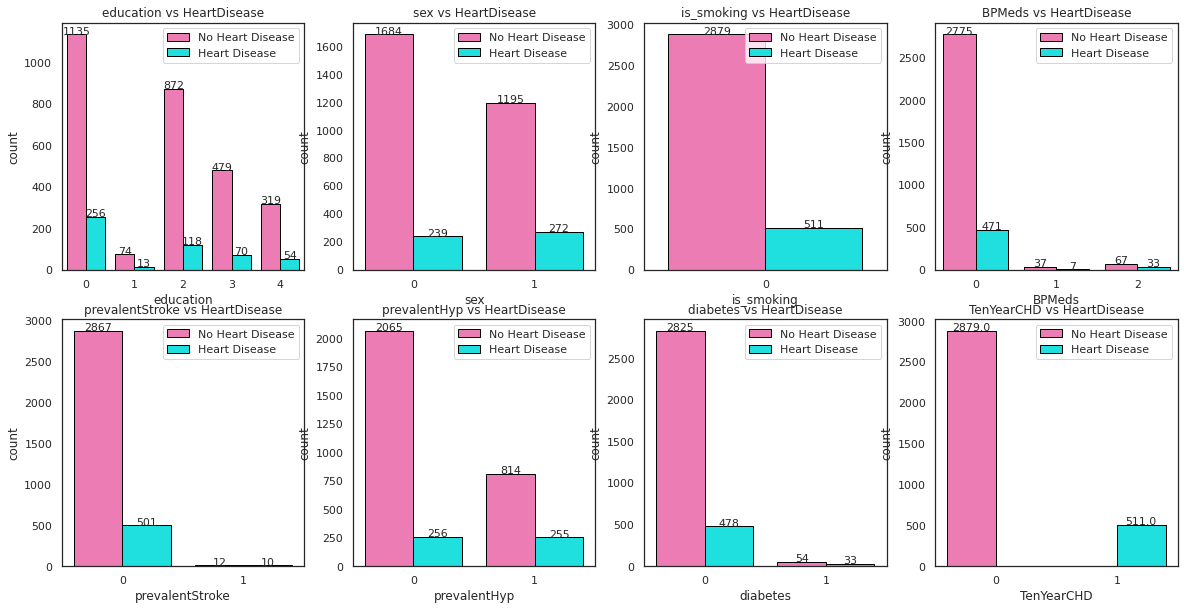

In [212]:
fig, ax = plt.subplots(nrows = 2,ncols = 4,figsize = (20,10)) # set the number of rows, number of columns and size of the sub plot
for i in range(len(categorical_features)): # pick up every features from categorical_features
    plt.subplot(2,4,i+1) # every iteration pick up one row and column and plot the features
    ax = sns.countplot(categorical_features[i],data = Heart_Attack_Risk_,hue = "TenYearCHD",palette = colors,edgecolor = 'black')  # plot evry categorical features w.r.t, tenyearchd
    for rect in ax.patches: # for every patches in plot
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11) # select total value of a bar and set the position the value 
    # title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease']) # set lebeled plot
    plt.title(categorical_features[i] + ' vs HeartDisease') # set the title of the plot

 
<b> Conclusion:
*   High level of educated people are less effected by heart attack. As the level of education is high so they may be foolow a healthy life as the result they are less affected. 
*   Male population has more heart disease patients than female patients. In the case of Female population, heart disease patients are less than no heart disease patients.

*   When a person is a smoker the ratio of heart diseaseis 2879:511
*   Previous stroke or hypertension record so much not effect on heart disease. 

*  Non diabetic patient are more prone to heart disease. 

















# <b><center>Distribution of Numerical Features

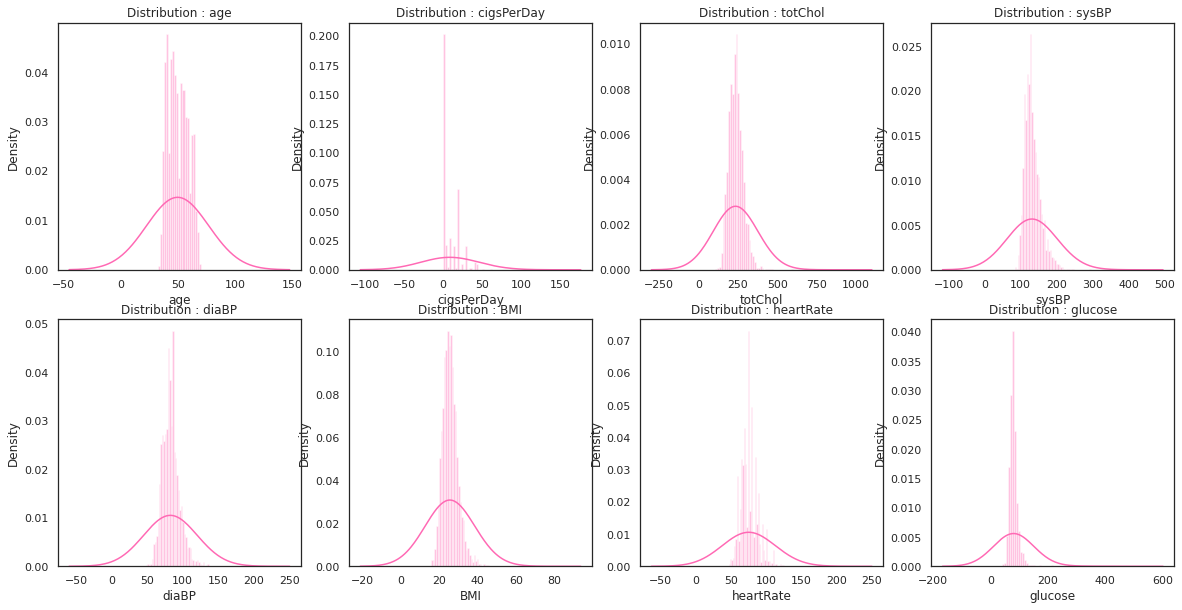

In [213]:
fig, ax = plt.subplots(nrows = 2,ncols = 4,figsize = (20,10)) # set the number of rows, number of columns and size of the sub plot
for i in range(len(numerical_features)): # pick up every features from numerical_features
    plt.subplot(2,4,i+1) # every iteration pick up one row and column and plot the features
    sns.distplot(Heart_Attack_Risk_[numerical_features[i]],kde_kws = {'bw' : 3},color = colors[0]) # plot the every features with bandwith 1 and set the first colour from the list of colors 
    # title = 'Distribution : ' + numerical_features[i]
    plt.title('Distribution : ' + numerical_features[i]) # set the title distribution + features name 

<b>Conclusion : After looking the distplot of the numerical features we can say that all the features are normally distributed.

# <b><center>Numerical Features vs Target Variable

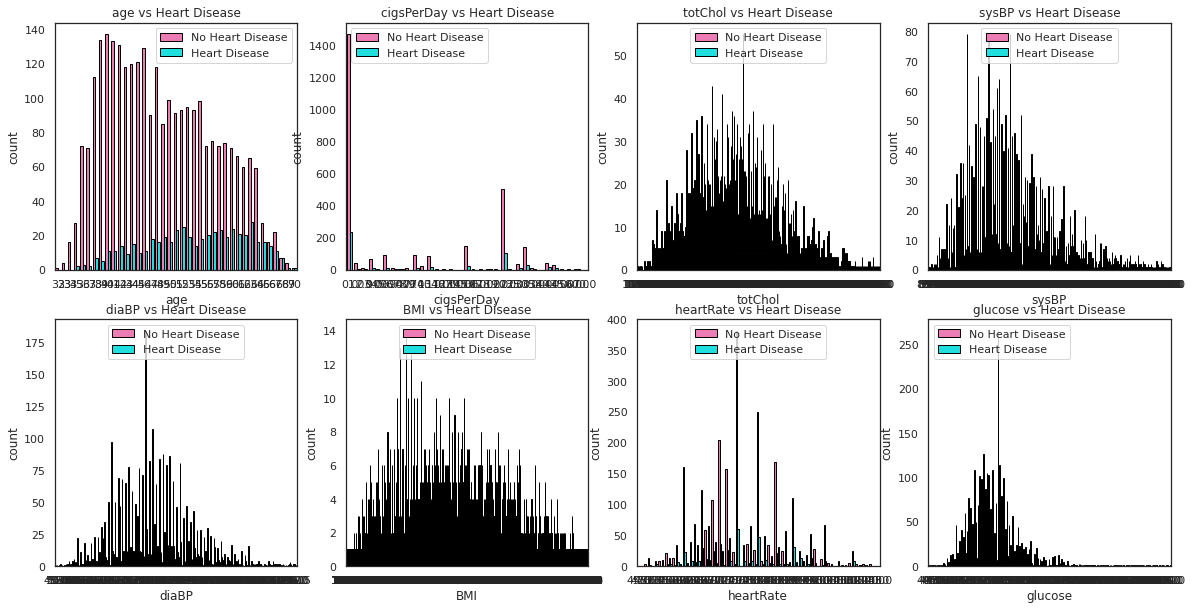

In [214]:
fig, ax = plt.subplots(nrows = 2,ncols = 4,figsize = (20,10)) # set the number of rows, number of columns and size of the sub plot
for i in range(len(numerical_features)): # pick up every features from numerical_features
    plt.subplot(2,4,i+1) # every iteration pick up one row and column and plot the features
    sns.countplot(numerical_features[i],data = Heart_Attack_Risk_,hue = "TenYearCHD",palette = colors, edgecolor = 'black') # plot evry numerical_features w.r.t, tenyearchd
    # title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease']) # set lebeled plot
    plt.title(numerical_features[i] + ' vs Heart Disease') # set the title of the plot

# <b><center><h1> &#x2022;&#x2022;&#x2022;&#x2022;&#x2022; Machine Learning&#x2022;&#x2022;&#x2022;&#x2022;&#x2022;</b></center></h1>

<b> Dummy Columns

In [215]:
# drop the column "sex" and "is_smoking" and create dummy columns of that column 
Heart_Attack_Risk_1 = pd.get_dummies(columns = ['sex','is_smoking'], data = Heart_Attack_Risk, drop_first = True)
Heart_Attack_Risk_1

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,64,2.0,3.0,0.000000,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,1
1,36,4.0,0.0,0.000000,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,1,0
2,46,1.0,10.0,0.000000,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0,1
3,50,1.0,20.0,0.000000,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,1
4,64,1.0,30.0,0.000000,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.000000,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0,0,0
3386,46,1.0,0.0,0.000000,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0,0,0
3387,44,3.0,3.0,0.000000,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1,1,1
3388,60,1.0,0.0,0.029886,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0,1,0


<b> Converting data types of the columns 

In [216]:
Heart_Attack_Risk_Final = Heart_Attack_Risk_1.astype('int32') # converting data type to int 32 

In [217]:
Heart_Attack_Risk_Final.info() # set the final data frame for Machine Learning 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              3390 non-null   int32
 1   education        3390 non-null   int32
 2   cigsPerDay       3390 non-null   int32
 3   BPMeds           3390 non-null   int32
 4   prevalentStroke  3390 non-null   int32
 5   prevalentHyp     3390 non-null   int32
 6   diabetes         3390 non-null   int32
 7   totChol          3390 non-null   int32
 8   sysBP            3390 non-null   int32
 9   diaBP            3390 non-null   int32
 10  BMI              3390 non-null   int32
 11  heartRate        3390 non-null   int32
 12  glucose          3390 non-null   int32
 13  TenYearCHD       3390 non-null   int32
 14  sex_M            3390 non-null   int32
 15  is_smoking_YES   3390 non-null   int32
dtypes: int32(16)
memory usage: 212.0 KB


#<b><center> Correlation

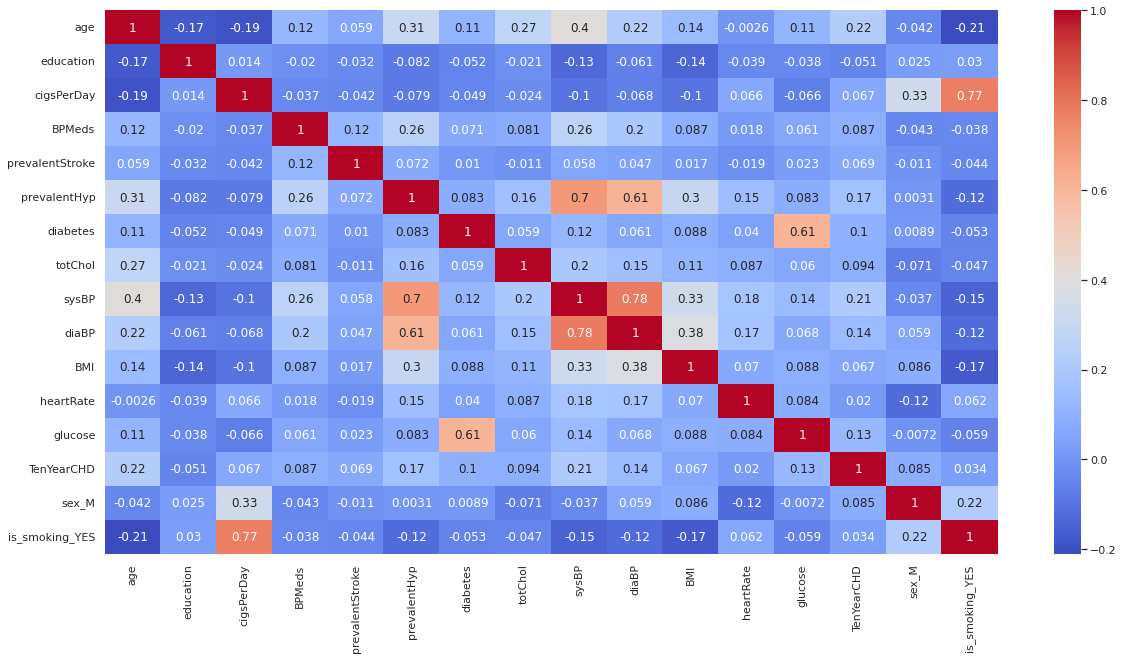

In [218]:
plt.figure(figsize = (20,10))
sns.heatmap(Heart_Attack_Risk_Final.corr(),cmap="coolwarm", annot= True) # check the correlation among the all features present in the data set

<b>Conclusion: From the correlation heat map we see that correlation among feautures are not too high. So, here we are not drop any column for feature modelling. 

#<b><center> Train- Test Split for features modelling

In [219]:
X, y = Heart_Attack_Risk_Final.drop('TenYearCHD',axis=1), Heart_Attack_Risk_Final['TenYearCHD'] 
# creating two data frame one with independent variable and other with dependent variable - " TenYearCHD"

# <b><center>SMOTE (synthetic minority oversampling technique) 

<b>We have a unbalance data set , so we have to do oversampling for better feature engineering.  

In [220]:
# Creating an instance for SMOTE
smote = SMOTE()

# Dividing data into independent (X) and dependent (y) variables
independent_variables = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'sysBP', 'diaBP', 'sex_M',"is_smoking_YES"]
dependent_variable = 'TenYearCHD'
X = Heart_Attack_Risk_Final.loc[:, independent_variables]
y = Heart_Attack_Risk_Final[dependent_variable]

# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')

# Using SMOTE to oversample
X,y = smote.fit_resample(X,y)

# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

X has 3390 rows and 15 columns
y has 3390 rows
2879
2879
Number of rows in X is 5758
Number of rows in y is 5758


<b> So, we had 3390 rows, and we oversample 2879 rows. Now we have 5758 rows for feature engineering.

In [221]:
# splitting train and test data set from X and y data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

#<b><center> Scaled Data

<b>*Standardization* is an important technique that is mostly performed as a pre-processing step before many machine learning models, to standardize the range of features of an input data set.
Here we use standard scaler method as we already see that out features are normally distributed.

In [222]:
scaler = StandardScaler() # creating instance for standard scaler 

X_train_scaled = scaler.fit_transform(X_train) # scaler fit for x- train
X_train = pd.DataFrame(X_train_scaled) # creating data frame with scaled x train data

X_test_scaled = scaler.transform(X_test) # scaler fit for x test data 
X_test = pd.DataFrame(X_test_scaled) # creating data frame with scaled x test data 

In [223]:
# shape of train and test data set of X
print("Train Shape:",X_train.shape)
print("Test Shape:",X_test.shape) 

Train Shape: (4030, 15)
Test Shape: (1728, 15)


In [224]:
# shape of train and test data set of y 
print("Train Shape:",y_train.shape)
print("Test Shape:",y_test.shape)

Train Shape: (4030,)
Test Shape: (1728,)


# <b><center>Feature Modelling

<b>Now Lets implement 10 models on our dataset:


*   Logistic Regression

*   K-Nearest Neighbour Classifier

*   Decission Tree Classifier

*   Random Forest Classifier

*   AdaBoost Classifier
*   Gradient Boosting Classifier


*   XGBoost Classifier


*   LightGBM Classifier


*   CatBoost Classifier


*   Gaussian Naive Bayes Classifier



We will be using two search algorithms for each :


*   GridSearchCV
*  RandomSearchCV


And we will evaluate accuracy metrics for ecah :    



*   Accuarcy
*   Precision


*   Recall

*   F1

*   ROC_AUc
*   Cross Validation






<b>Import all model classifier 

In [225]:
lr_clf = LogisticRegression(solver='saga', max_iter=5000) # setting classifier for logistic regression 
# In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme 
# if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss 
# if the ‘multi_class’ option is set to ‘multinomial’. 
# (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

knns_clf = KNeighborsClassifier() # setting classifier for K- nearest neighbourhood 

# svm_clf = SVC()

dt_clf = DecisionTreeClassifier() # setting classifier for decision tree classifier 

rf_clf = RandomForestClassifier() # setting classifier for random forest classifier 

ada_clf = AdaBoostClassifier() # setting classifier for adaboost classifier

gb_clf = GradientBoostingClassifier() # setting classifier for gradient boosting classifier 

lgbm_clf = lgb.LGBMClassifier() # setting classifier for light gradient boosting method classifier 

xgb_clf = xgb.XGBClassifier() # setting classifier for xtreme gradient boosting classifier 

cb_clf = CatBoostClassifier() # setting classifier for catboost classifier 

gnb_clf = GaussianNB() # setting classifier for gaussian naive bayes classifier 

<b>Set the parameters for all the classification model

In [226]:
# parameters for the classifier model 
# parameter for logistic regression 
lr_params = {'C':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],'penalty':['l1', 'l2']}  #lasso and ridge regression

# parameter for k-nearest neighbourhood 
knns_params = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

#svm_params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

# parameter for decision tree 
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_leaf': range(1,5)}

#parameter for random forest 
rf_params = {'criterion' :['gini', 'entropy'], 'min_samples_leaf': [3, 5], 'min_samples_split': [8,12], 'n_estimators': [50,100]}

# parameter for adaboost classifier 
ada_params = {'n_estimators': [50,100], 'learning_rate': [0.01, 0.1, 0.2, 0.5, 1]}

# parameter for gradient boosting classifier 
gb_params = {"loss": ["exponential"], "learning_rate": [0.001,0.005,0.01],"max_depth": [4,12], "max_features": ["log2", "sqrt"], "n_estimators": [50,100]}

# parameter for light gradient boosting method 
lgbm_params = {'num_leaves':[5,15,25], 'min_child_samples':[5, 10, 15], 'learning_rate':[0.001,0.005,0.01], 'objective': ['binary']}

# parameter for xtreme gradient bosting classifier 
xgb_params = {'max_depth': range (2, 10), 'n_estimators': [50,100],'learning_rate': [0.001,0.005,0.01]}

# parameter for catboost classifier 
cb_params = {'depth': [4,12], 'learning_rate': [0.001,0.005,0.01],'n_estimators': [50,100], 'loss_function': ['Logloss', 'CrossEntropy']}

# parameter for gaussian naive bayes classifier 
gnb_params = {'priors': [None], 'var_smoothing': np.logspace(0,-9, num=100)}

<b>Creating function for evaluate grid search cv , randomized search cv, make prediction, best score and evaluate all accuracy metrics.

In [227]:
# creating a function to evaluate grid search cv for each model 
def fit_grid(clf, params, cv=5, X_train=X_train, y_train=y_train):
    grid = GridSearchCV(clf, params, cv=KFold(n_splits=cv), n_jobs=1, verbose=1, return_train_score=True, scoring='accuracy', refit=True) #verbose and n_jobs help us see the computation time and score of a cv. Higher the value of verbose, more the information printed out.
    grid.fit(X_train, y_train)
    return grid

# creating a function to evaluate randomized search cv for each model 
def fit_randomized(clf, params, cv=5, X_train=X_train, y_train=y_train):
    random = RandomizedSearchCV(clf, params, cv=KFold(n_splits=cv), n_jobs=1, verbose=1, return_train_score=True, scoring='accuracy', refit=True)
    random.fit(X_train, y_train)
    return random

# creating a function to evaluate prediction of the model 
def make_predictions(model, X_test=X_test):
    return model.predict(X_test)

# creating a function to evaluate best parameter of the model and best score of the model for that parameter 
def best_scores(model):
    print(f'The best parameters are: {model.best_params_}')
    print(f'The best score that we got is: {model.best_score_}')
    return None

# creating a function to show all the accuracy metrics for the model 
def check_scores(y_pred):
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    print('ROC-AUC Score: %.3f' % roc_auc_score(y_test, y_pred))
    # print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = KFold(n_splits=cv),scoring = 'roc_auc').mean()))
    return None

# <b><center>Logistic Regression

<b>a. Grid Search

In [228]:
lr_model_grid = fit_grid(lr_clf, lr_params) # fit the model
best_scores(lr_model_grid) # best parameter and score 
lr_y_grid_pred = make_predictions(lr_model_grid) # prediction on y set 
check_scores(lr_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 26 candidates, totalling 130 fits
The best parameters are: {'C': 0.1, 'penalty': 'l2'}
The best score that we got is: 0.6734491315136476
Precision: 0.680
Recall: 0.694
Accuracy: 0.688
F1 Score: 0.687
ROC-AUC Score: 0.688


<b>b. Randomized Search

In [229]:
lr_model_random = fit_randomized(lr_clf, lr_params) # fit the model
best_scores(lr_model_random) # best parameter and score
lr_y_random_pred = make_predictions(lr_model_random) # prediction on y set
check_scores(lr_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'penalty': 'l1', 'C': 100000.0}
The best score that we got is: 0.6717121588089331
Precision: 0.680
Recall: 0.694
Accuracy: 0.688
F1 Score: 0.687
ROC-AUC Score: 0.688


#<b><center> K- Nearest Neighbour Classifier 

<b>a. Grid Search

In [230]:
knns_model_grid = fit_grid(knns_clf, knns_params) # fit the model
best_scores(knns_model_grid) # best parameter and score
knns_y_grid_pred = make_predictions(knns_model_grid) # prediction on y set
check_scores(knns_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 120 candidates, totalling 600 fits
The best parameters are: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
The best score that we got is: 0.8019851116625312
Precision: 0.755
Recall: 0.950
Accuracy: 0.823
F1 Score: 0.841
ROC-AUC Score: 0.825


<b> b. Randomized Search

In [231]:
knns_model_random = fit_randomized(knns_clf, knns_params) # fit the model
best_scores(knns_model_grid) # best parameter and score
knns_y_random_pred = make_predictions(knns_model_random) # prediction on y set
check_scores(knns_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
The best score that we got is: 0.8019851116625312
Precision: 0.741
Recall: 0.932
Accuracy: 0.806
F1 Score: 0.825
ROC-AUC Score: 0.807


#<b><center> Decission Tree Classifier 

<b>a. Grid Search

In [232]:
dt_model_grid = fit_grid(dt_clf, dt_params) # fit the model
best_scores(dt_model_grid) # best parameter and score
dt_y_grid_pred = make_predictions(dt_model_grid) # prediction on y set
check_scores(dt_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 72 candidates, totalling 360 fits
The best parameters are: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}
The best score that we got is: 0.7004962779156327
Precision: 0.694
Recall: 0.773
Accuracy: 0.720
F1 Score: 0.731
ROC-AUC Score: 0.721


<b>b. Randomized Search

In [233]:
dt_model_random = fit_randomized(dt_clf, dt_params) # fit the model
best_scores(dt_model_random) # best parameter and score
dt_y_random_pred = make_predictions(dt_model_random) # prediction on y set
check_scores(dt_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'min_samples_leaf': 3, 'max_depth': 9, 'criterion': 'entropy'}
The best score that we got is: 0.6977667493796527
Precision: 0.694
Recall: 0.781
Accuracy: 0.722
F1 Score: 0.735
ROC-AUC Score: 0.723


#<b><center> Random Forest Classifier

<b>a. Grid Search

In [234]:
rf_model_grid = fit_grid(rf_clf, rf_params) # fit the model
best_scores(rf_model_grid) # best parameter and score
rf_y_grid_pred = make_predictions(rf_model_grid) # prediction on y set
check_scores(rf_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
The best parameters are: {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
The best score that we got is: 0.8131513647642679
Precision: 0.814
Recall: 0.893
Accuracy: 0.847
F1 Score: 0.852
ROC-AUC Score: 0.847


<b>b. Randomized Search

In [235]:
rf_model_random = fit_randomized(rf_clf, rf_params) # fit the model
best_scores(rf_model_random) # best parameter and score
rf_y_random_pred = make_predictions(rf_model_random) # prediction on y set
check_scores(rf_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 3, 'criterion': 'entropy'}
The best score that we got is: 0.8104218362282879
Precision: 0.820
Recall: 0.880
Accuracy: 0.845
F1 Score: 0.849
ROC-AUC Score: 0.846


#<b><center> AdaBoost Classifier

<b>a. Grid Search

In [236]:
ada_model_grid = fit_grid(ada_clf, ada_params) # fit the model
best_scores(ada_model_grid) # best parameter and score
ada_y_grid_pred = make_predictions(ada_model_grid) # prediction on y set
check_scores(ada_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'learning_rate': 1, 'n_estimators': 100}
The best score that we got is: 0.7161290322580646
Precision: 0.714
Recall: 0.765
Accuracy: 0.733
F1 Score: 0.739
ROC-AUC Score: 0.734


<b>b. Randomized Search

In [237]:
ada_model_random = fit_randomized(ada_clf, ada_params) # fit the model
best_scores(ada_model_random) # best parameter and score
ada_y_random_pred = make_predictions(ada_model_random) # prediction on y set
check_scores(ada_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 100, 'learning_rate': 1}
The best score that we got is: 0.7161290322580646
Precision: 0.714
Recall: 0.765
Accuracy: 0.733
F1 Score: 0.739
ROC-AUC Score: 0.734


# <b><center>Gradient Boosting Classifier

<b>a. Grid Search 

In [238]:
gb_model_grid = fit_grid(gb_clf, gb_params) # fit the model
best_scores(rf_model_grid) # best parameter and score
gb_y_grid_pred = make_predictions(gb_model_grid) # prediction on y set
check_scores(gb_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best parameters are: {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
The best score that we got is: 0.8131513647642679
Precision: 0.807
Recall: 0.915
Accuracy: 0.851
F1 Score: 0.858
ROC-AUC Score: 0.852


<b>b. Randomized Search

In [239]:
gb_model_random = fit_randomized(gb_clf, gb_params) # fit the model
best_scores(gb_model_random) # best parameter and score
gb_y_random_pred = make_predictions(gb_model_random) # prediction on y set
check_scores(gb_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 12, 'loss': 'exponential', 'learning_rate': 0.005}
The best score that we got is: 0.8267990074441688
Precision: 0.810
Recall: 0.912
Accuracy: 0.851
F1 Score: 0.858
ROC-AUC Score: 0.852


#<b><center> XGBoost Classifier

<b>a. Grid Search

In [240]:
xgb_model_grid = fit_grid(xgb_clf, xgb_params) # fit the model
best_scores(xgb_model_grid) # best parameter and score
xgb_y_grid_pred = make_predictions(xgb_model_grid) # prediction on y set
check_scores(xgb_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best parameters are: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100}
The best score that we got is: 0.7667493796526055
Precision: 0.752
Recall: 0.865
Accuracy: 0.793
F1 Score: 0.805
ROC-AUC Score: 0.794


<b>b. Randomized Search

In [241]:
xgb_model_random = fit_randomized(xgb_clf, xgb_params) # fit the model
best_scores(xgb_model_random) # best parameter and score
xgb_y_random_pred = make_predictions(xgb_model_random) # prediction on y set
check_scores(xgb_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01}
The best score that we got is: 0.7302729528535981
Precision: 0.703
Recall: 0.843
Accuracy: 0.747
F1 Score: 0.767
ROC-AUC Score: 0.748


#<b><center> LightGBM Classifier

<b>a. Grid Search

In [242]:
lgb_model_grid = fit_grid(lgbm_clf, lgbm_params) # fit the model
best_scores(lgb_model_grid) # best parameter and score
lgb_y_grid_pred = make_predictions(lgb_model_grid) # prediction on y set
check_scores(lgb_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
The best parameters are: {'learning_rate': 0.01, 'min_child_samples': 10, 'num_leaves': 25, 'objective': 'binary'}
The best score that we got is: 0.7364764267990075
Precision: 0.729
Recall: 0.798
Accuracy: 0.754
F1 Score: 0.762
ROC-AUC Score: 0.755


<b>b. Randomized Search

In [243]:
lgb_model_random = fit_randomized(lgbm_clf, lgbm_params) # fit the model
best_scores(lgb_model_random) # best parameter and score
lgb_y_random_pred = make_predictions(lgb_model_random) # prediction on y set
check_scores(lgb_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'objective': 'binary', 'num_leaves': 25, 'min_child_samples': 15, 'learning_rate': 0.005}
The best score that we got is: 0.7208436724565757
Precision: 0.711
Recall: 0.775
Accuracy: 0.734
F1 Score: 0.742
ROC-AUC Score: 0.734


#<b><center> CatBoost Classifier

<b>a. Grid Search

In [ ]:
cb_model_grid = fit_grid(cb_clf, cb_params) # fit the model

In [245]:
best_scores(cb_model_grid) # best parameter and score
cb_y_grid_pred = make_predictions(cb_model_grid) # prediction on y set
check_scores(cb_y_grid_pred) # all accuarcy metrics 

The best parameters are: {'depth': 12, 'learning_rate': 0.01, 'loss_function': 'Logloss', 'n_estimators': 100}
The best score that we got is: 0.7287841191066997
Precision: 0.703
Recall: 0.835
Accuracy: 0.745
F1 Score: 0.763
ROC-AUC Score: 0.746


<b>b. Randomized Search

In [ ]:
cb_model_random = fit_randomized(cb_clf, cb_params) # fit the model

In [247]:
best_scores(cb_model_random) # best parameter and score
cb_y_random_pred = make_predictions(cb_model_random) # prediction on y set
check_scores(cb_y_random_pred) # all accuarcy metrics 

The best parameters are: {'n_estimators': 100, 'loss_function': 'Logloss', 'learning_rate': 0.01, 'depth': 12}
The best score that we got is: 0.7287841191066997
Precision: 0.703
Recall: 0.835
Accuracy: 0.745
F1 Score: 0.763
ROC-AUC Score: 0.746


#<b><center> Gaussian Naive Bayes Classifier

<b>a. Grid Search

In [248]:
gnb_model_grid = fit_grid(gnb_clf, gnb_params) # fit the model
best_scores(gnb_model_grid) # best parameter and score
gnb_y_grid_pred = make_predictions(lr_model_grid) # prediction on y set
check_scores(gnb_y_grid_pred) # all accuarcy metrics 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are: {'priors': None, 'var_smoothing': 0.657933224657568}
The best score that we got is: 0.6181141439205956
Precision: 0.680
Recall: 0.694
Accuracy: 0.688
F1 Score: 0.687
ROC-AUC Score: 0.688


<b>b. Randomized Search

In [249]:
gnb_model_random = fit_randomized(gnb_clf, gnb_params) # fit the model
best_scores(gnb_model_random) # best parameter and score
gnb_y_random_pred = make_predictions(lr_model_random) # prediction on y set
check_scores(gnb_y_random_pred) # all accuarcy metrics 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are: {'var_smoothing': 3.511191734215127e-05, 'priors': None}
The best score that we got is: 0.6176178660049627
Precision: 0.680
Recall: 0.694
Accuracy: 0.688
F1 Score: 0.687
ROC-AUC Score: 0.688


#<b><center> Best Model 

<b>select best estimator from all the models

In [250]:
LogisticRegression_Grid_Model = lr_model_grid.best_estimator_ # select best estimator from logistic regression grid search cv 
LogisticRegression_Randomized_Model = lr_model_grid.best_estimator_ # select best estimator from logistic regression randomized search cv

K_NearestNeighbour_Grid_Model = knns_model_grid.best_estimator_ # select best estimator from k nearest neighbourhood grid search cv
K_NearestNeighbour_Randomized_Model = knns_model_random.best_estimator_ # select best estimator from k nearest neighbourhood randomized search cv

DecissionTree_Grid_Model = dt_model_grid.best_estimator_ # select best estimator from decission tree grid search cv
DecissionTree_Randomized_Model = dt_model_random.best_estimator_ # select best estimator from decission tree randomized search cv

RandomForest_Grid_Model = rf_model_grid.best_estimator_ # select best estimator from random forest grid search cv
RandomForest_Randomized_Model = rf_model_random.best_estimator_ # select best estimator from random forest randomized search cv

AdaBoost_Grid_Model = ada_model_grid.best_estimator_ # select best estimator from ada boost grid search cv
AdaBoost_Randomized_Model = ada_model_random.best_estimator_ # select best estimator from ada boost randomized search cv

GradientBoosting_Grid_Model = gb_model_grid.best_estimator_ # select best estimator from gradient boosting grid search cv
GradientBoosting_Randomized_Model = gb_model_random.best_estimator_ # select best estimator from gradient boosting randomized search cv

XGBoost_Grid_Model = xgb_model_grid.best_estimator_ # select best estimator from xtreme gradient boosting grid search cv
XGBoost_Randomized_Model = xgb_model_random.best_estimator_ # select best estimator from xtreme gradient boosting randomized search cv

LGBoost_Grid_Model = lgb_model_grid.best_estimator_ # select best estimator from light gradient boosting grid search cv
LGBoost_Randomized_Model = lgb_model_random.best_estimator_ # select best estimator from randomized search cv

CatBoost_Grid_Model = cb_model_grid.best_estimator_ # select best estimator from catboost grid search cv
CatBoost_Randomized_Model = cb_model_random.best_estimator_ # select best estimator from catboost randomized search cv

GaussianNaiveBayes_Grid_Model = gnb_model_grid.best_estimator_ # select best estimator from gaussian naive bayes grid search cv
GaussianNaiveBayes_Randomized_Model = gnb_model_random.best_estimator_ # select best estimator from gaussian naive bayes randomized search cv

<b>list of model

In [299]:
models = [LogisticRegression_Grid_Model, LogisticRegression_Randomized_Model,K_NearestNeighbour_Grid_Model,K_NearestNeighbour_Randomized_Model,
          DecissionTree_Grid_Model,DecissionTree_Randomized_Model,RandomForest_Grid_Model,RandomForest_Randomized_Model,
          AdaBoost_Grid_Model,AdaBoost_Randomized_Model,GradientBoosting_Grid_Model,GradientBoosting_Randomized_Model,
         XGBoost_Grid_Model,XGBoost_Randomized_Model,LGBoost_Grid_Model,LGBoost_Randomized_Model,CatBoost_Grid_Model,CatBoost_Randomized_Model,
          GaussianNaiveBayes_Grid_Model,GaussianNaiveBayes_Randomized_Model] # create a list of model with best estimators of all the models 

<b>create a dataframe with all the accuracy metrics of the models 

In [ ]:
cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC'] # create a list with all accuracy metrics 
model_df = pd.DataFrame(columns=cols) # create a data frame whose columns are the accuracy metrics 
conf_train, conf_test = {}, {} # create a dictionary for confusion matrix of test and train data 
  
i = 0
for model in models: # for every model in list of models 
      model.fit(X_train, y_train) # fit the data of x-train and y-train 
      y_pred_train = model.predict(X_train) # prediction of y on x-train data 
      y_pred_test = model.predict(X_test) # prediction of y on x-test data 

      model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(2) # evaluate  accuracy score of train data 
      model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(2) # evaluate accuracy score of test data
      model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train).round(2) # evaluate  precission score of train data 
      model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test).round(2) # evaluate precission score of test data
      model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(2) # evaluate  recall score of train data 
      model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(2) # evaluate recall score of test data
      model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train).round(2) # evaluate  f1 score of train data 
      model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test).round(2) # evaluate f1 score of test data
      model_df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(2) # evaluate  roc-accuracy score of train data 
      model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(2) # evaluate roc-accuracy score of test data
      model_df.loc[i,'Train CV score'] = cross_val_score(model,X_train,y_train,cv = KFold(n_splits=5),scoring = 'roc_auc').mean() # evaluate  cv score of train data 
      model_df.loc[i,'Test CV score'] = cross_val_score(model,X_test,y_test,cv = KFold(n_splits=5),scoring = 'roc_auc').mean() # evaluate cv score of test data

      conf_train[model.__class__.__name__] = confusion_matrix(y_train, y_pred_train) # evaluate  confusion matrix of train data 
      conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test) # evaluate confusion matrix of test data 

      i+=1
#insert the name of the classification model column 
model_df.insert(0, "Classification Model", ['Logistic_Regressor_GridSearchCV', 'Logistic_Regressor_RandomizedSearchCV', 
                                            'K_Nearest_Neighbour_GridSearchCV','K_Nearest_Neighbour_RandomizedSearchCV',
                                            'Decision_Tree_GridSearchCV', 'Decision_Tree_RandomizedSearchCV',
                                            'Random_Forest_GridSearchCV', 'Random_Forest_RandomizedSearchCV',
                                            'AdaBoost_GridSearchCV', 'AdaBoost_RandomizedSearchCV',
                                            'Gradient_Boosting_GridSearchCV', 'Gradient_Boosting_RandomizedSearchCV',
                                            'XGBoost_GridSearchCV', 'XGBoost_RandomizedSearchCV',
                                            'LightGBM_GridSearchCV','LightGBM_RandomizedSearchCV',
                                            'CatBoost_GridSearchCV', 'CatBoost_RandomizedSearchCV',
                                            'Gaussian_Naive_Bayes_GridSearchCV', 'Gaussian_Naive_Bayes_RandomizedSearchCV'], True)

In [304]:
model_df.sort_values(by='Test ROC-AUC',ascending=False).style.background_gradient(cmap = "Blues") # show the model dataframe with all accuracy metrics measurement

,Classification Model,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC,Train CV score,Test CV score
10,Gradient_Boosting_GridSearchCV,0.980000,0.850000,0.970000,0.800000,1.000000,0.920000,0.990000,0.850000,0.980000,0.850000,0.915458,0.876653
11,Gradient_Boosting_RandomizedSearchCV,0.980000,0.850000,0.970000,0.810000,1.000000,0.910000,0.980000,0.860000,0.980000,0.850000,0.916422,0.874438
6,Random_Forest_GridSearchCV,0.970000,0.840000,0.980000,0.810000,0.970000,0.880000,0.980000,0.840000,0.970000,0.840000,0.895688,0.843948
7,Random_Forest_RandomizedSearchCV,0.980000,0.840000,0.980000,0.810000,0.980000,0.880000,0.980000,0.840000,0.980000,0.840000,0.896338,0.846721
2,K_Nearest_Neighbour_GridSearchCV,1.000000,0.820000,1.000000,0.750000,1.000000,0.950000,1.000000,0.840000,1.000000,0.820000,0.801345,0.748909
3,K_Nearest_Neighbour_RandomizedSearchCV,1.000000,0.810000,1.000000,0.740000,1.000000,0.930000,1.000000,0.830000,1.000000,0.810000,0.777746,0.734711
12,XGBoost_GridSearchCV,0.890000,0.790000,0.850000,0.750000,0.940000,0.870000,0.900000,0.800000,0.890000,0.790000,0.850919,0.805386
16,CatBoost_GridSearchCV,0.790000,0.740000,0.750000,0.700000,0.880000,0.830000,0.810000,0.760000,0.790000,0.750000,0.822703,0.799029
17,CatBoost_RandomizedSearchCV,0.790000,0.740000,0.750000,0.700000,0.880000,0.830000,0.810000,0.760000,0.790000,0.750000,0.822703,0.799029
13,XGBoost_RandomizedSearchCV,0.780000,0.750000,0.730000,0.700000,0.870000,0.840000,0.790000,0.770000,0.770000,0.750000,0.812378,0.798461


<b>Here we see that on the basis of test ROC-AUC score best model is Gradient Boosting model, and the best algorithm is grid search cv. 

# <b><center>Confusion Matrix and ROC- Curve 

<b>confusion matrix of train dataset 

In [254]:
conf_train # confusion matrix of training data set 

{'LogisticRegression': array([[1322,  681],
        [ 621, 1406]]), 'KNeighborsClassifier': array([[2003,    0],
        [   0, 2027]]), 'DecisionTreeClassifier': array([[1535,  468],
        [ 399, 1628]]), 'RandomForestClassifier': array([[1960,   43],
        [  48, 1979]]), 'AdaBoostClassifier': array([[1423,  580],
        [ 490, 1537]]), 'GradientBoostingClassifier': array([[1948,   55],
        [   1, 2026]]), 'XGBClassifier': array([[1368,  635],
        [ 271, 1756]]), 'LGBMClassifier': array([[1421,  582],
        [ 430, 1597]]), 'CatBoostClassifier': array([[1406,  597],
        [ 253, 1774]]), 'GaussianNB': array([[1630,  373],
        [1156,  871]])}

In [255]:
conf_train = pd.DataFrame(conf_train.items(), columns=['Classification Model', 'Confusion Matrix']) # dataframe of classification model and confusion matrix of train data set 
conf_train

,Classification Model,Confusion Matrix
0,LogisticRegression,"[[1322, 681], [621, 1406]]"
1,KNeighborsClassifier,"[[2003, 0], [0, 2027]]"
2,DecisionTreeClassifier,"[[1535, 468], [399, 1628]]"
3,RandomForestClassifier,"[[1960, 43], [48, 1979]]"
4,AdaBoostClassifier,"[[1423, 580], [490, 1537]]"
5,GradientBoostingClassifier,"[[1948, 55], [1, 2026]]"
6,XGBClassifier,"[[1368, 635], [271, 1756]]"
7,LGBMClassifier,"[[1421, 582], [430, 1597]]"
8,CatBoostClassifier,"[[1406, 597], [253, 1774]]"
9,GaussianNB,"[[1630, 373], [1156, 871]]"


<b>Confusion matrix test data set 

In [256]:
conf_test # confusion matrix of test data set 

{'LogisticRegression': array([[598, 278],
        [261, 591]]), 'KNeighborsClassifier': array([[598, 278],
        [ 58, 794]]), 'DecisionTreeClassifier': array([[587, 289],
        [187, 665]]), 'RandomForestClassifier': array([[699, 177],
        [102, 750]]), 'AdaBoostClassifier': array([[615, 261],
        [200, 652]]), 'GradientBoostingClassifier': array([[700, 176],
        [ 75, 777]]), 'XGBClassifier': array([[573, 303],
        [134, 718]]), 'LGBMClassifier': array([[608, 268],
        [192, 660]]), 'CatBoostClassifier': array([[576, 300],
        [141, 711]]), 'GaussianNB': array([[725, 151],
        [485, 367]])}

In [257]:
conf_test = pd.DataFrame(conf_test.items(), columns=['Classification Model', 'Confusion Matrix'])
conf_test # dataframe of classification model and confusion matrix of test data set 

,Classification Model,Confusion Matrix
0,LogisticRegression,"[[598, 278], [261, 591]]"
1,KNeighborsClassifier,"[[598, 278], [58, 794]]"
2,DecisionTreeClassifier,"[[587, 289], [187, 665]]"
3,RandomForestClassifier,"[[699, 177], [102, 750]]"
4,AdaBoostClassifier,"[[615, 261], [200, 652]]"
5,GradientBoostingClassifier,"[[700, 176], [75, 777]]"
6,XGBClassifier,"[[573, 303], [134, 718]]"
7,LGBMClassifier,"[[608, 268], [192, 660]]"
8,CatBoostClassifier,"[[576, 300], [141, 711]]"
9,GaussianNB,"[[725, 151], [485, 367]]"


#<b> ROC_AUC Curve

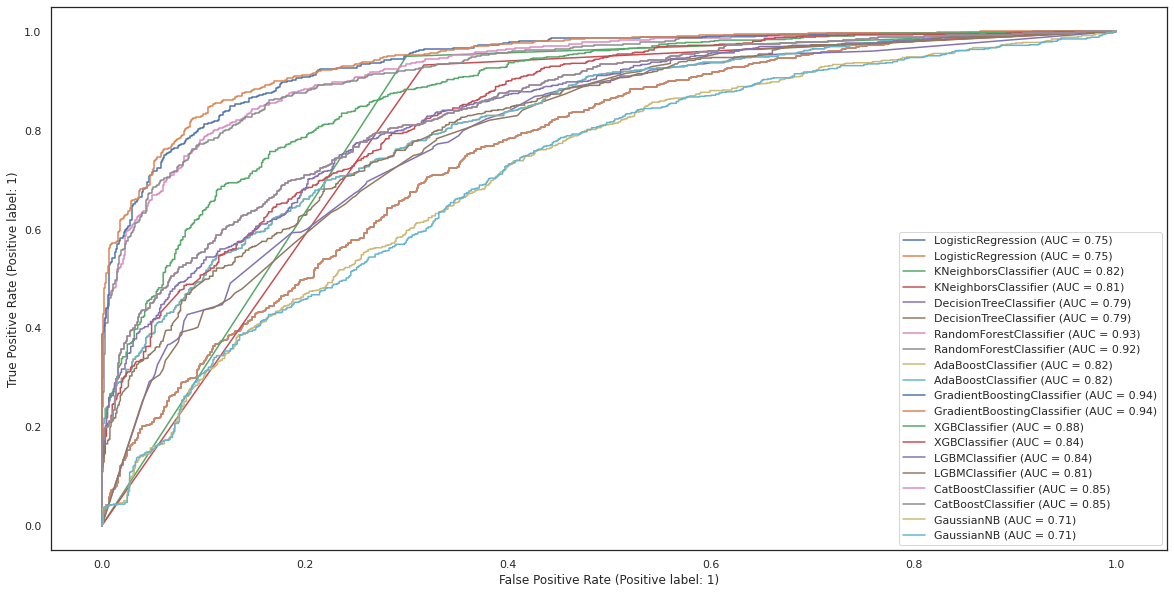

In [258]:
plt.figure(figsize=(20,10)) # set the figure size 
ax = plt.gca() # to get the current Axes instance on the current figure matching the given keyword args, or create one
for i in models: # for every model in model list
    plot_roc_curve(i, X_test, y_test, ax=ax) # plot the roc_auc curve 
plt.show() # show the figure

# <b>Confusion Matrix 

In [259]:
classifiers = [lr_clf, knns_clf,dt_clf,rf_clf,ada_clf,gb_clf,lgbm_clf,xgb_clf,cb_clf,gnb_clf] # create a list of classifier 
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc']) # create a dataframe with classifier list, false positive rate, true positive rate and accuracy

In [ ]:
for cls in classifiers: # for every class in classifier list 
    model = cls.fit(X_train, y_train) # fit the every model on train data
    yproba = model.predict_proba(X_test)[::,1] # predict the data on test set
    fpr, tpr, _ = roc_curve(y_test,  yproba) # calculate false postive rate and true positive rate
    auc = roc_auc_score(y_test, yproba) # calculate accuracy score
    result_table = result_table.append({'classifiers':cls.__class__.__name__,'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True) # append all results on result table
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True) # set the table

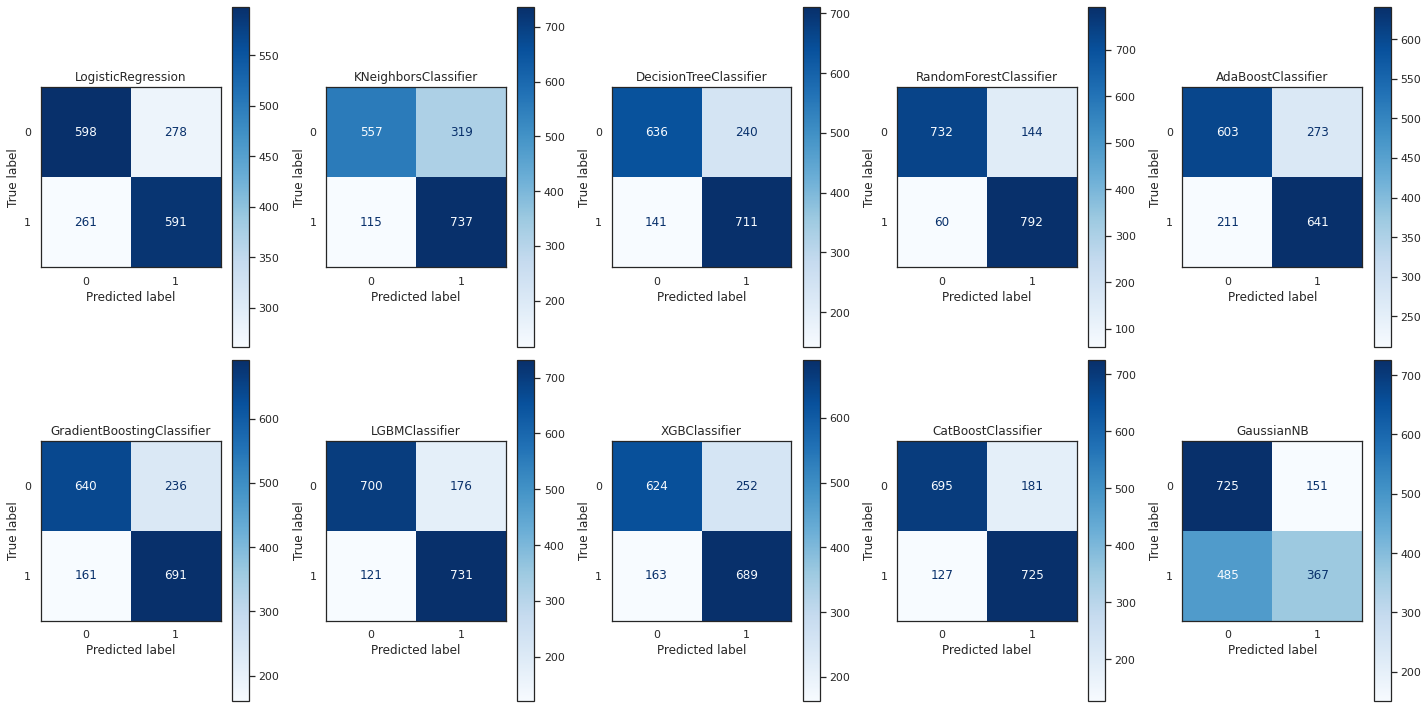

In [261]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10)) # set the number of rows and columns and figure size 

for cls, ax in zip(classifiers, axes.flatten()): #axes.flatten()- returns a flattened version of the array
    plot_confusion_matrix(cls, X_test, y_test, ax=ax, cmap='Blues') # plot the confusion matrix 
    ax.title.set_text(type(cls).__name__) # set the title of the plot 
plt.tight_layout() # Adjust the padding between and around subplots
plt.show() # show the plot 

# <b><center>Gradient Boosting with Hyperparameter Tunning

In [290]:
gb_hyp_params = {"loss": ["exponential"], "learning_rate": [0.0001,0.001,0.01],"max_depth": [20], "max_features": ["log2", "sqrt"], "n_estimators": [200]}
# set the parameter for gradient boosting hyperparameter tunning 

In [291]:
gb_hyp_grid = GridSearchCV(estimator=gb_clf, param_grid = gb_hyp_params, cv = 10, verbose=2, scoring='roc_auc')
# set the grid search cv for gradient boostin hyperparameter tunning 
gb_hyp_grid.fit(X_train,y_train) # fit for the train data set

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END learning_rate=0.0001, loss=exponential, max_depth=20, max_features=log2, n_estimators=200; total time=  26.2s
[CV] END learning_rate=0.0001, loss=exponential, max_depth=20, max_features=log2, n_estimators=200; total time=  16.8s
[CV] END learning_rate=0.0001, loss=exponential, max_depth=20, max_features=log2, n_estimators=200; total time=  16.6s
[CV] END learning_rate=0.0001, loss=exponential, max_depth=20, max_features=log2, n_estimators=200; total time=  16.5s
[CV] END learning_rate=0.0001, loss=exponential, max_depth=20, max_features=log2, n_estimators=200; total time=  16.5s
[CV] END learning_rate=0.0001, loss=exponential, max_depth=20, max_features=log2, n_estimators=200; total time=  16.6s
[CV] END learning_rate=0.0001, loss=exponential, max_depth=20, max_features=log2, n_estimators=200; total time=  17.0s
[CV] END learning_rate=0.0001, loss=exponential, max_depth=20, max_features=log2, n_estimators=200; total 

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01],
                         'loss': ['exponential'], 'max_depth': [20],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [200]},
             scoring='roc_auc', verbose=2)

In [292]:
cross_val_score(gb_clf, X_train, y_train, cv=10).mean() # cross validation score for train data set 

0.7545905707196029

In [293]:
cross_val_score(gb_clf, X_test, y_test, cv=10).mean() # cross validation scoere for test data set 

0.7512098400322624

In [294]:
print('Train ROC-AUC score : ', gb_hyp_grid.best_estimator_.score(X_train,y_train)) # train roc- auc score 
print('Test ROC-AUC score : ', gb_hyp_grid.best_estimator_.score(X_test,y_test)) # test roc-auc score

Train ROC-AUC score :  1.0
Test ROC-AUC score :  0.9004629629629629


In [305]:
gb_hyp_grid_model = gb_hyp_grid.best_estimator_ # select best parameter for hyperparameter 

<b>Create a dataframe with all accuracy metrics of hyperparameter tunning model

In [306]:
cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC'] # create a list with all accuracy metrics 
gb_hyp_grid_model_df = pd.DataFrame(columns=cols) # create a data frame whose columns are the accuracy metrics 
gb_hyp_grid_model.fit(X_train, y_train) # fit the data of x-train and y-train 
y_pred_train = gb_hyp_grid_model.predict(X_train) # prediction of y on x-train data 
y_pred_test = gb_hyp_grid_model.predict(X_test) # prediction of y on x-test data

gb_hyp_grid_model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(2) # evaluate  accuracy score of train data
gb_hyp_grid_model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(2) # evaluate accuracy score of test data
gb_hyp_grid_model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train).round(2) # evaluate  precission score of train data 
gb_hyp_grid_model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test).round(2) # evaluate precission score of test data
gb_hyp_grid_model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(2) # evaluate  recall score of train data
gb_hyp_grid_model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(2) # evaluate recall score of test data
gb_hyp_grid_model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train).round(2) # evaluate  f1 score of train data
gb_hyp_grid_model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test).round(2) # evaluate f1 score of test data
gb_hyp_grid_model_df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(2) # evaluate  roc-accuracy score of train data 
gb_hyp_grid_model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(2) # evaluate roc-accuracy score of test data
gb_hyp_grid_model_df.loc[i,'Train CV score'] = cross_val_score(model,X_train,y_train,cv = KFold(n_splits=10),scoring = 'roc_auc').mean() # evaluate  cv score of train data 
gb_hyp_grid_model_df.loc[i,'Test CV score'] = cross_val_score(model,X_test,y_test,cv = KFold(n_splits=10),scoring = 'roc_auc').mean()  # evaluate cv score of test data
gb_hyp_grid_model_df.insert(0, "Classification Model", ['GradienBoosting Hyperparameter tuned Model'])

In [307]:
gb_hyp_grid_model_df # show the results of hyperparameter tunning in a dataframe 

,Classification Model,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC,Train CV score,Test CV score
20,GradienBoosting Hyperparameter tuned Model,1.0,0.9,1.0,0.88,1.0,0.93,1.0,0.9,1.0,0.9,0.702854,0.700393


<b> Conclusion :  After looking the hyperparameter tunning we clearly see that:


*  Train Accuracy Score change by 2% (98% to 100%)

*   Test Accuracy Score change by 5% (85% to 90%)

*   Train Precision Score change by 3% (97% to 100%)

*   Test Precission Score change by 8% (80% to 88%)

*   Train Recall Score change by 0% (It shows 100% in both cases)

*   Test Recall Score change by 1% (92% to 93%)

*   Train F1 Score change by 1% (99% to 100%)
*   Test F1 Score change by 4% (85% to 90%)


*   Train ROC-AUC SCore change by 2% (98% to 100%)


*   Test ROC-AUC Score change by 4% (85% to 90%)







#<b><center> SHAP (SHapley Additive exPlanations)

<b>import shap for show the importance of feautures 

In [270]:
!pip install shap # install the shap module 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [271]:
import shap # import shap module 
shap.initjs()

<b>Feature Importance plot for train data set

In [272]:
explainer_train = shap.TreeExplainer(GradientBoosting_Grid_Model) # shap tree explainer on train data set for gradient boosting grid model 
shap_values_train = explainer_train.shap_values(X_train) 

In [273]:
shap_df = pd.DataFrame(X_train, columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP','BMI',
                                           'heartRate', 'glucose','sex_M','is_smoking_YES']) # select the column for show the feature importance of that column 

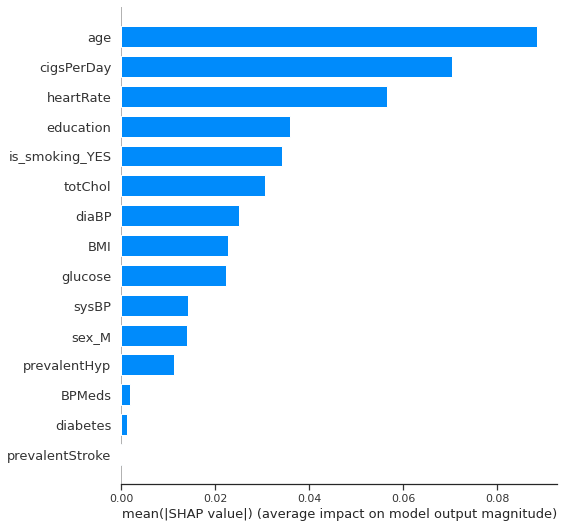

In [274]:
shap.summary_plot(shap_values_train,shap_df,plot_type='bar') # summary plot of feature importance 

<b>Feature Importance plot for test data set

In [275]:
explainer_test = shap.TreeExplainer(GradientBoosting_Grid_Model) # shap tree explainer on test data set for gradient boosting grid model 
shap_values_test = explainer_test.shap_values(X_test)

In [276]:
shap_df_test = pd.DataFrame(X_test, columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP','BMI', 
                                                'heartRate', 'glucose','sex_M','is_smoking_YES'])# select the column for show the feature importance of that column

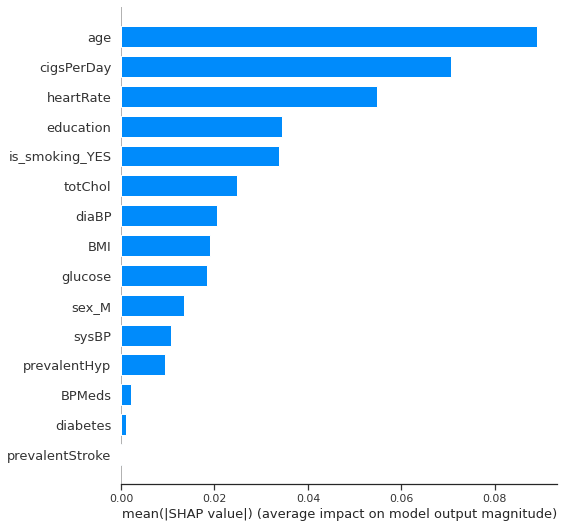

In [277]:
shap.summary_plot(shap_values_test,shap_df_test,plot_type='bar') # summary plot of feature importance 

<b>Summary plot of feautures importance of train and test data show that the top 5 features are "age', "cigsperday","heartrate", "education" and "is_smoking_yes".

# <b><center>Predictions

<b>Scenario: A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.

She is a 40 year old female(educationlevel is 2), currently she is smoker and consuming 3 ciggerettes oer day.

She has no records of blood pressure and stroke but she has hypertension and diabetes with glucose level 115.

In addition she has cholesterol level 150, systolic and diastolic blood pressure are 172 and 99 respectively.

Hee heart rate and BMI is 85 and 25 respectively.

Based on this information, classify this patient with Heart Disease.

In [278]:
print(gb_clf.predict(scaler.transform([[40,2,3,0,0,1,1,150,172,99,25,85,115,0,1]]))) #predict the scenario

[0]


X does not have valid feature names, but StandardScaler was fitted with feature names


<b>Conclusion: Our machine learning algorithm has classified this patient with no Heart Disease.



<b>Predicting the Test set results:

First value represents our predicted value, Second value represents our actual value.

If the values match, then we predicted correctly. 

In [279]:
y_pred = gb_clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


<b>We can see that our results are very accurate

<b>Overall Conclusion :

As conclusion to the project, I would like to summarize the process and some details of the project.


*   The data was cleaned, an EDA was performed, transformation of data was done in order to ensure it fits well into machine learning models, modelling along with evaluation of the models was done and finally hyperparameter tuning was done in an attempt to imporve the model.
*   10 models were used in the project, namely, Logistic Regression, Gradient Boosting, CatBoost, AdaBoost, LightGBM, Decision Tree,  Random Forest, XGB Classifier, KNN and Gausian Naive Bayes. 

<u>Gradient Boosting was best performing base model.</u> Hyperparameter tuning was done on the same model.


*   The final results of the model are almost close to the base model and we have acheived <u>90% test accuracy</u> where as we have acheived <u>93% test recall.</u>
*   Using SHAP we identified the feature importances and identified that, age, cigsperday, heartrate, education and is_smoking were 5 main influencers.











